# Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load data

In [35]:
# Load the dataset
shopeasy_df = pd.read_csv('shopEasy.csv')

# Display the first five rows of the dataset
shopeasy_df.head()

personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   C10573   1034.660626        0.833333    1308.11          1308.11   
1   C16889    777.853474        0.666667       0.00             0.00   
2   C12964     97.453056        0.818182     334.73           334.73   
3   C11171      0.000000        0.000000      12.65             0.00   
4   C17582     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  ...  emergencyCount  \
0                0.500000                  0.000000  ...               1   
1                0.000000                  0.000000  ...               8   
2                0.083333                  0.000000  ...               1   
3                0.000000                  0.083333  ...               0   
4                0.166667                  0.000000  ...               0   

   itemCount  maxSpendLimit  monthlyPaid  leastAmountPaid  \
0          8         1500.0   236.764555       207.007715   
1          0         2000.0    89.741508       173.276205   
2          1         2500.0   234.271939       117.297542   
3          1         5000.0     0.000000              NaN   
4          1         1500.0   118.438703        54.138711   

   paymentCompletionRate  accountLifespan     location accountType webUsage  
0                   0.00                6     New York     Premium       60  
1                   0.00                6  Los Angeles     Premium        5  
2                   0.25               12     New York     Student       21  
3                   0.00               12      Chicago     Premium       53  
4                   0.00                6     New York     Premium       59  

[5 rows x 21 columns]

# Look at data

In [36]:
print(f'There are {shopeasy_df.shape[0]} rows and {shopeasy_df.shape[1]} columns in the dataset.')

There are 8950 rows and 21 columns in the dataset.


In [37]:
shopeasy_df.describe().T

count         mean          std        min  \
accountTotal              8950.0  1564.474828  2081.531879   0.000000   
frequencyIndex            8950.0     0.877271     0.236904   0.000000   
itemCosts                 8950.0  1003.204834  2136.634782   0.000000   
singleItemCosts           8950.0   592.437371  1659.887917   0.000000   
multipleItemCosts         8950.0   411.067645   904.338115   0.000000   
emergencyFunds            8950.0   978.871112  2097.163877   0.000000   
itemBuyFrequency          8950.0     0.490351     0.401371   0.000000   
singleItemBuyFrequency    8950.0     0.202458     0.298336   0.000000   
multipleItemBuyFrequency  8950.0     0.364437     0.397448   0.000000   
emergencyUseFrequency     8950.0     0.135144     0.200121   0.000000   
emergencyCount            8950.0     3.248827     6.824647   0.000000   
itemCount                 8950.0    14.709832    24.857649   0.000000   
maxSpendLimit             8949.0  4494.449450  3638.815725  50.000000   
monthlyPaid               8950.0  1733.143852  2895.063757   0.000000   
leastAmountPaid           8637.0   864.206542  2372.446607   0.019163   
paymentCompletionRate     8950.0     0.153715     0.292499   0.000000   
accountLifespan           8950.0    11.517318     1.338331   6.000000   
webUsage                  8950.0    49.422570    28.808219   0.000000   

                                  25%          50%          75%          max  
accountTotal               128.281915   873.385231  2054.140036  19043.13856  
frequencyIndex               0.888889     1.000000     1.000000      1.00000  
itemCosts                   39.635000   361.280000  1110.130000  49039.57000  
singleItemCosts              0.000000    38.000000   577.405000  40761.25000  
multipleItemCosts            0.000000    89.000000   468.637500  22500.00000  
emergencyFunds               0.000000     0.000000  1113.821139  47137.21176  
itemBuyFrequency             0.083333     0.500000     0.916667      1.00000  
singleItemBuyFrequency       0.000000     0.083333     0.300000      1.00000  
multipleItemBuyFrequency     0.000000     0.166667     0.750000      1.00000  
emergencyUseFrequency        0.000000     0.000000     0.222222      1.50000  
emergencyCount               0.000000     0.000000     4.000000    123.00000  
itemCount                    1.000000     7.000000    17.000000    358.00000  
maxSpendLimit             1600.000000  3000.000000  6500.000000  30000.00000  
monthlyPaid                383.276166   856.901546  1901.134317  50721.48336  
leastAmountPaid            169.123707   312.343947   825.485459  76406.20752  
paymentCompletionRate        0.000000     0.000000     0.142857      1.00000  
accountLifespan             12.000000    12.000000    12.000000     12.00000  
webUsage                    24.000000    49.000000    74.000000     99.00000

## Dataset Overview

Our dataset comprises 8,950 records, each representing a unique user on the ShopEasy platform. The features encompass a range of user behaviors, financial transactions, and demographic data. Here's a careful interpretation of each feature:

### Financial and Transactional Data
- **`accountTotal`**: The average total amount spent by users is $1,564.47, with a wide range in spending (min: $0, max: $19,043.14). This indicates diverse spending habits among users.
- **`itemCosts`**: Users on average spend $1,003.20 on items, but with significant variation (std: $2,136.63), suggesting differing purchasing power or preferences.
- **`singleItemCosts`** and **`multipleItemCosts`**: The average costs for single-item and multiple-item purchases are $592.44 and $411.07, respectively. The higher mean and standard deviation for single-item costs imply more substantial one-time purchases.
- **`monthlyPaid`**: On average, users pay $1,733.14 per month, with a high standard deviation (std: $2,895.06), highlighting varied monthly spending behaviors.
- **`leastAmountPaid`**: The least amount paid in a single transaction averages at $864.21, but varies greatly among users.

### User Behavior Metrics
- **`frequencyIndex`**, **`itemBuyFrequency`**, **`singleItemBuyFrequency`**, **`multipleItemBuyFrequency`**: These features indicate shopping frequency, with mean values less than 1 for most, except for `frequencyIndex`. This suggests users are not frequent shoppers, with occasional spikes in purchasing behavior.
- **`emergencyUseFrequency`** and **`emergencyCount`**: Users infrequently use emergency funds (mean: 0.135), but there's a significant range in the number of times these funds are used (std: 6.82).

### ShopEasy Specific Features
- **`emergencyFunds`**: Users keep an average of $978.87 in emergency funds, but the high standard deviation indicates a wide variation in this behavior.
- **`maxSpendLimit`**: The average maximum spend limit set by ShopEasy is $4,494.45, suggesting trust in users' spending ability.
- **`accountLifespan`**: Most users have been registered with ShopEasy for around 11.5 months, indicating a relatively new user base.
- **`webUsage`**: The average web usage score is 49.42, suggesting a moderate level of engagement through web browsers.

### Implications for Customer Segmentation
The diversity in spending habits, frequency of purchases, and user engagement levels highlighted by the dataset underscores the need for personalized marketing strategies. Segmenting customers based on these features will enable ShopEasy to tailor experiences, offers, and services to different user groups, enhancing customer satisfaction and loyalty.


In [38]:
shopeasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

There are three text fields: 'personId', 'location' and 'accountType'

In [39]:
# Check if 'personId' is unique
shopeasy_df["personId"].is_unique

True

'personId' is unique and can be dropped.

In [40]:
#Drop 'personId'
shopeasy_df.drop('personId', axis=1, inplace=True)

In [41]:
# Count NaN values
missing_values = shopeasy_df.isnull().sum()

# Display the count of NaN values per column
print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


'maxSpendLimit' and 'leastAmountPaid' have respectively 1 and 313 missing values.

# Handle missing data

In [42]:
# Drop row with missing value in 'maxSpendLimit', since there is only one
shopeasy_df.dropna(subset=['maxSpendLimit'], inplace=True)

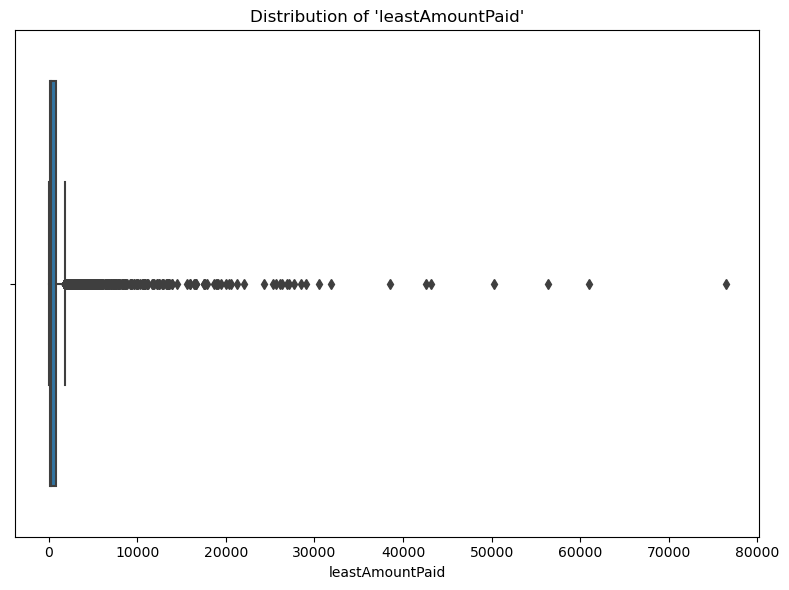

In [43]:
# Distribution of 'leastAmountPaid'
plt.figure(figsize=(8, 6))

sns.boxplot(x=shopeasy_df['leastAmountPaid'])
plt.title("Distribution of 'leastAmountPaid'")

plt.tight_layout()
plt.show()

## Data Cleaning and Imputation

In this section, we perform targeted data cleaning and imputation to address missing or illogical values in the `leastAmountPaid` feature of our dataset. This feature represents the least amount paid by a user in a single transaction, and ensuring its accuracy is crucial for our analysis.

### Steps for Data Imputation:

1. **Zero Imputation for Zero Item Counts:**
   - For users who have not purchased any items (`itemCount` == 0), it's logical to assume that the least amount paid should also be zero. This assumption is based on the understanding that no transaction means no payment.
   - Code: `shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0`

2. **Using Item Costs for Single Item Purchases:**
   - When a user has purchased only one item (`itemCount` == 1), the `leastAmountPaid` should logically be equal to the cost of that item (`itemCosts`). This step corrects any discrepancies where the least amount paid doesn't match the item cost for single-item purchases.
   - Code: `shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['itemCosts']`

3. **Median Imputation for Remaining Missing Data:**
   - For the rest of the missing data in the `leastAmountPaid` column, we use median imputation. The median is chosen over the mean as it is less sensitive to outliers, making it a more robust measure for imputation in skewed distributions.
   - This step ensures that all records have a meaningful and statistically reasonable value for `leastAmountPaid`, enhancing the reliability of our subsequent analyses.
   - Code: `shopeasy_df['leastAmountPaid'].fillna(shopeasy_df['leastAmountPaid'].median(), inplace=True)`


In [44]:
# Substitute with 0 where 'itemCount' is 0
shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0

# Substitute with 'itemCosts' where 'itemCount' is 1
shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['itemCosts']

# Substitute with the median for the remaining missing data
shopeasy_df['leastAmountPaid'].fillna(shopeasy_df['leastAmountPaid'].median(), inplace=True)

In [45]:
# Count NaN values after imputation
missing_values_after_imputation = shopeasy_df.isnull().sum()

# Display the count of NaN values per column
print('Missing Values After Imputation Summary:')
print(missing_values_after_imputation)

Missing Values After Imputation Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


# Handle categorical data

## Encoding Categorical Features

In preparation for clustering, we need to convert categorical features into a numerical format. This step is crucial as clustering algorithms require numerical inputs to calculate distances or similarities between data points.

### Encoding Strategy:

1. **One-Hot Encoding for 'location':**
   - The `location` feature is a nominal categorical variable with no inherent order (e.g., city names). 
   - We use One-Hot Encoding for this feature to prevent the introduction of artificial ordinality. In One-Hot Encoding, each unique value in the `location` column is transformed into a separate binary (0 or 1) column, ensuring that no unintended order is implied.
   - Code: `shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])`

2. **Label Encoding for 'accountType':**
   - Contrary to `location`, `accountType` is an ordinal categorical feature with a meaningful order (Regular, Premium, Student). 
   - We use Label Encoding for `accountType` to preserve this inherent order. Label Encoding assigns a unique integer to each category according to its order. This approach is suitable for ordinal data where the relative ordering of categories carries meaningful information.
   - Code: 
     ```python
     le = LabelEncoder()
     shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])
     ```

3. **Dropping the Original 'accountType' Column:**
   - After encoding `accountType`, the original column is redundant and can be dropped from our dataset.
   - Code: `shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)`

4. **Dataframe Preview:**
   - Finally, we display the first five rows of the modified dataframe to verify our encoding.
   - Code: `shopeasy_df_encoded.head()`

Through these encoding steps, our dataset is now transformed into a completely numerical format, making it ready for clustering and other machine learning algorithms that require numerical inputs.


In [46]:
# One-hot encoding for 'location'
shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])

# Label encoding for 'accountType'
le = LabelEncoder()
shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])

# Drop the original 'accountType' column
shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)

# Display the first five rows of the encoded dataframe
shopeasy_df_encoded.head()

accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   1034.660626        0.833333    1308.11          1308.11   
1    777.853474        0.666667       0.00             0.00   
2     97.453056        0.818182     334.73           334.73   
3      0.000000        0.000000      12.65             0.00   
4     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  emergencyUseFrequency  \
0                0.500000                  0.000000               0.166667   
1                0.000000                  0.000000               0.500000   
2                0.083333                  0.000000               0.083333   
3                0.000000                  0.083333               0.000000   
4                0.166667                  0.000000               0.000000   

   ...  maxSpendLimit  monthlyPaid  leastAmountPaid  paymentCompletionRate  \
0  ...         1500.0   236.764555       207.007715                   0.00   
1  ...         2000.0    89.741508         0.000000                   0.00   
2  ...         2500.0   234.271939       334.730000                   0.25   
3  ...         5000.0     0.000000        12.650000                   0.00   
4  ...         1500.0   118.438703        57.000000                   0.00   

   accountLifespan  webUsage  location_Chicago  location_Los Angeles  \
0                6        60             False                 False   
1                6         5             False                  True   
2               12        21             False                 False   
3               12        53              True                 False   
4                6        59             False                 False   

   location_New York  accountType_encoded  
0               True                    0  
1              False                    0  
2               True                    2  
3              False                    0  
4               True                    0  

[5 rows x 22 columns]

# Scale data

## Feature Categorization in the Dataset

To better understand the structure of our dataset and prepare it for analysis, we categorize the features into numeric and categorical types. This categorization aids in applying appropriate statistical methods and machine learning algorithms that are specific to the nature of the data.

### Steps for Feature Categorization:

1. **Listing All Columns:**
   - We first retrieve a list of all columns in the encoded dataframe (`shopeasy_df_encoded`).
   - Code: `all_columns = shopeasy_df_encoded.columns.tolist()`

2. **Identifying Numeric Columns:**
   - We identify all numeric columns by selecting those that include numerical data types (like integers and floats).
   - This step is crucial as numeric columns can be directly used in calculations and modeling.
   - Code: `numeric_columns = shopeasy_df.select_dtypes(include=['number']).columns.tolist()`
   - The number of numeric columns is also counted for reference.
   - Code: `num_of_numeric_columns = len(numeric_columns)`

3. **Extracting Categorical Columns:**
   - The categorical columns are identified by excluding the numeric columns from the list of all columns.
   - This step is performed by slicing the `all_columns` list from the index corresponding to the number of numeric columns.
   - Code: 
     ```python
     categoric_columns = all_columns[num_of_numeric_columns:]
     num_of_categoric_columns = len(categoric_columns)
     ```

### Outcome:

- We now have two separate lists of columns, `numeric_columns` and `categoric_columns`, and their respective counts. 
- This separation is essential for subsequent data processing and analysis, as different types of features often require different handling and analytical techniques.

By categorizing the features, we ensure that our data analysis pipeline is structured and tailored to the specific nature of each feature, enabling more accurate and meaningful insights.


In [47]:
all_columns = shopeasy_df_encoded.columns.tolist()

numeric_columns = shopeasy_df.select_dtypes(include=['number']).columns.tolist()
num_of_numeric_columns = len(numeric_columns)

categoric_columns = all_columns[num_of_numeric_columns:]
num_of_categoric_columns = len(categoric_columns)

The `plot_distribution` function creates a grid of Kernel Density Estimate (KDE) plots for the numeric columns in a DataFrame. 

- It takes two arguments: a DataFrame `df` and a string `title`.
- The subplot grid is set to have 3 rows, and the number of columns per row is calculated based on the total number of numeric columns.
- A new figure is created with a size that depends on the number of subplots.
- A loop is used to create a subplot for each numeric column. For each subplot:
  - A KDE plot is created for the current column, with the area under the curve filled.
  - The title of the subplot is set to the name of the current column.
  - The x and y labels are set to 'Value' and 'Density', respectively.
- The title of the figure is set to the `title` argument passed to the function.
- `plt.tight_layout()` is used to adjust the subplot parameters so that the subplot(s) fit into the figure area.
- Finally, the figure is displayed with `plt.show()`.

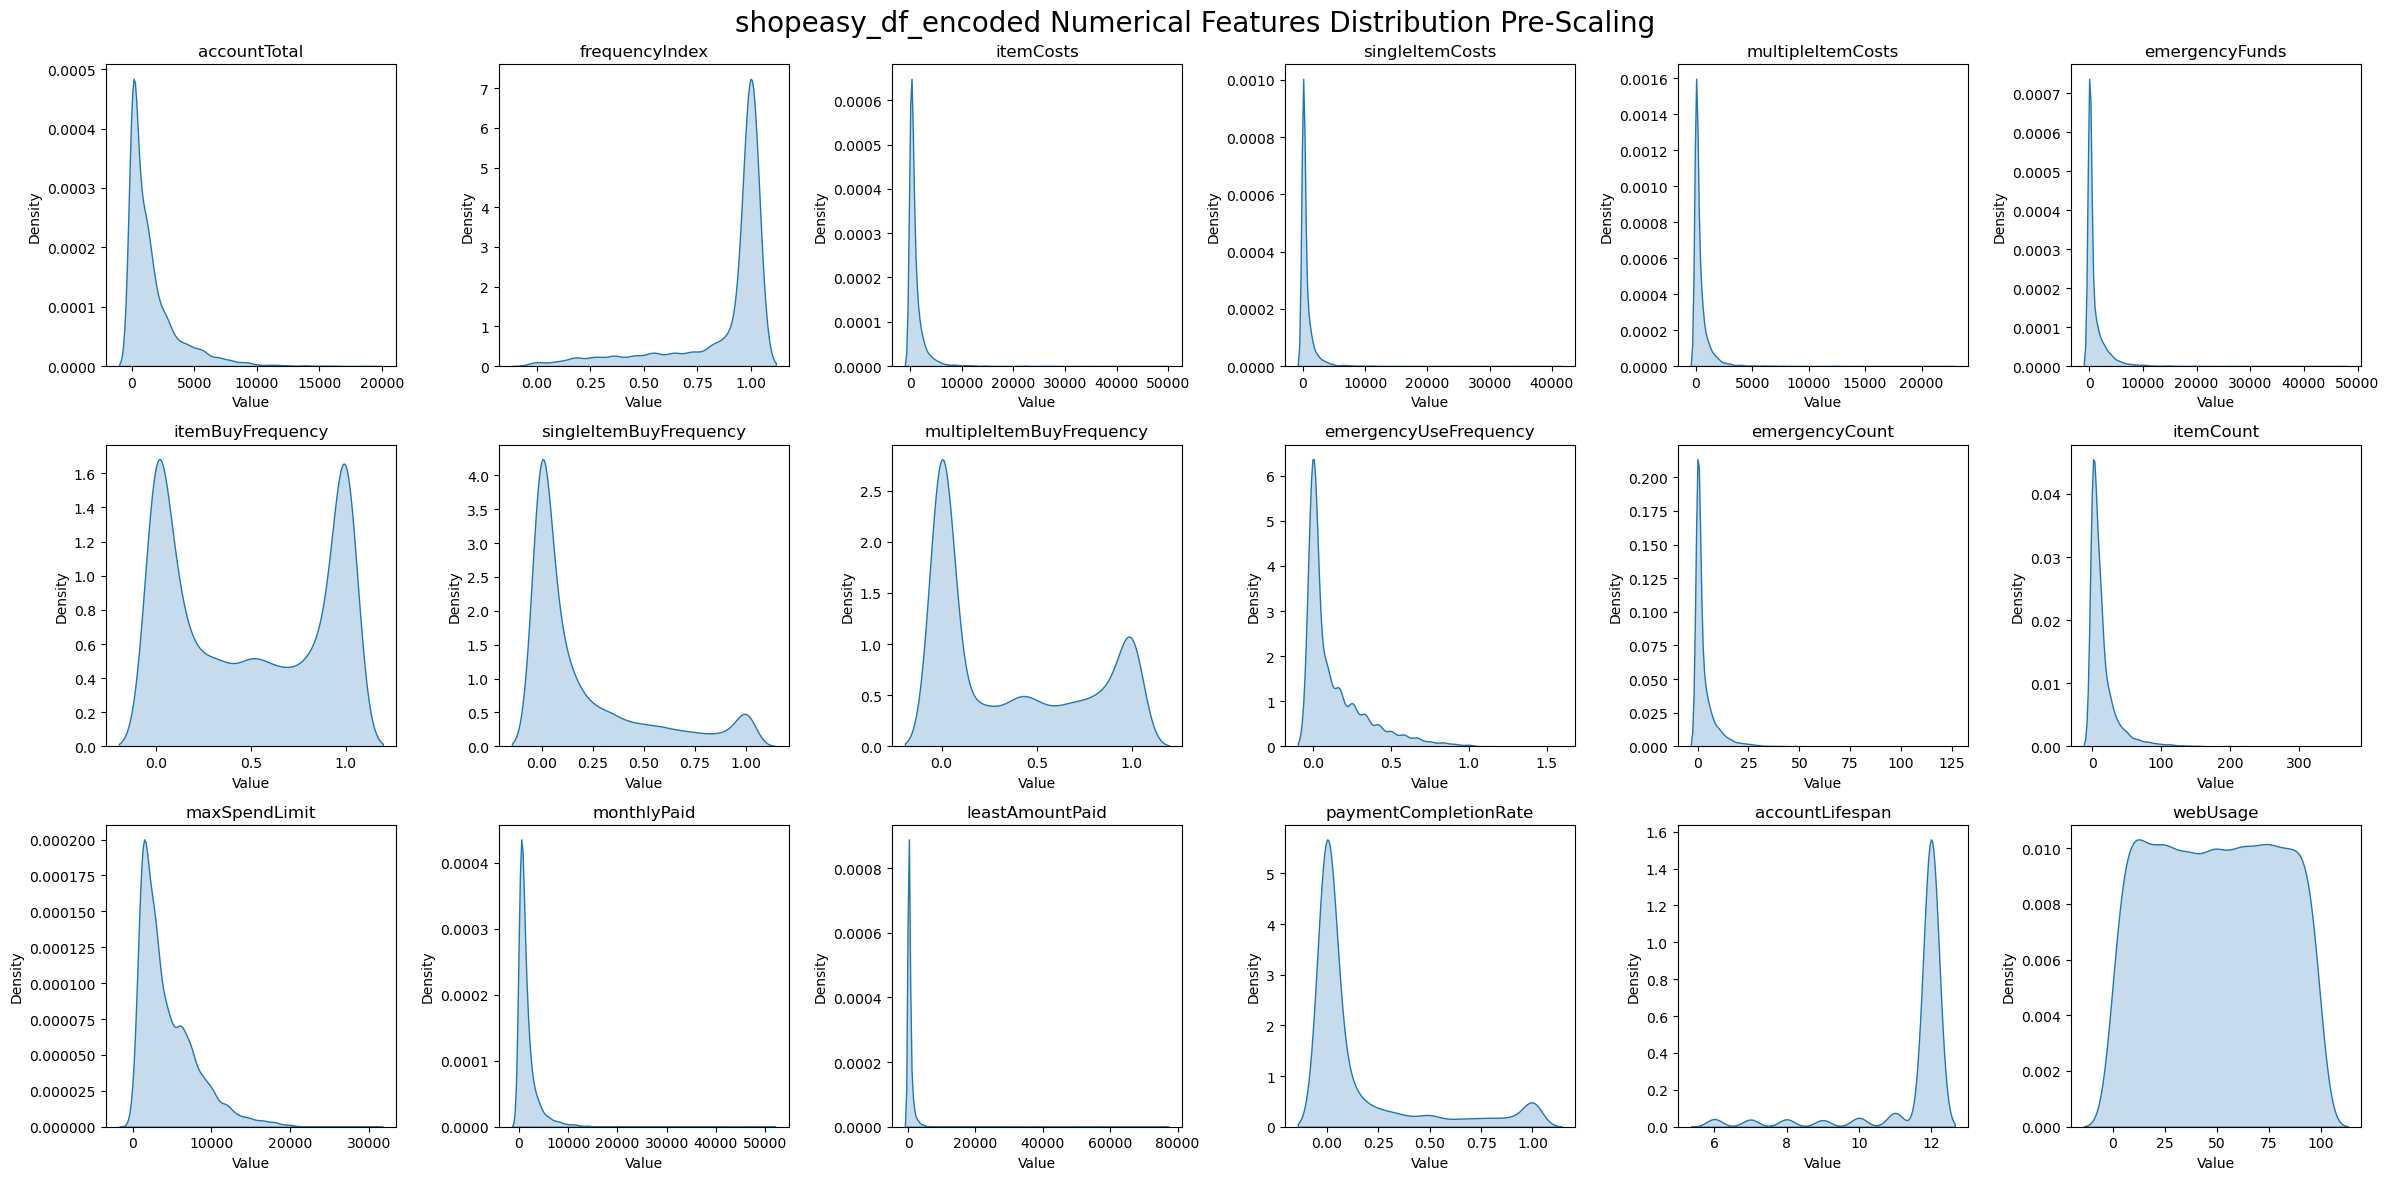

In [48]:
# Plot distributions pre-scaling
def plot_distribution(df, title):  
    num_rows = 3
    num_columns_per_row = (num_of_numeric_columns // num_rows)

    plt.figure(figsize=(4 * num_columns_per_row, 4 * num_rows)) 

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_columns_per_row, i)
        sns.kdeplot(df[column], fill=True)
        plt.title(f'{column}')
        plt.xlabel('Value')
        plt.ylabel('Density')
    
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

plot_distribution(shopeasy_df_encoded, 'shopeasy_df_encoded Numerical Features Distribution Pre-Scaling')

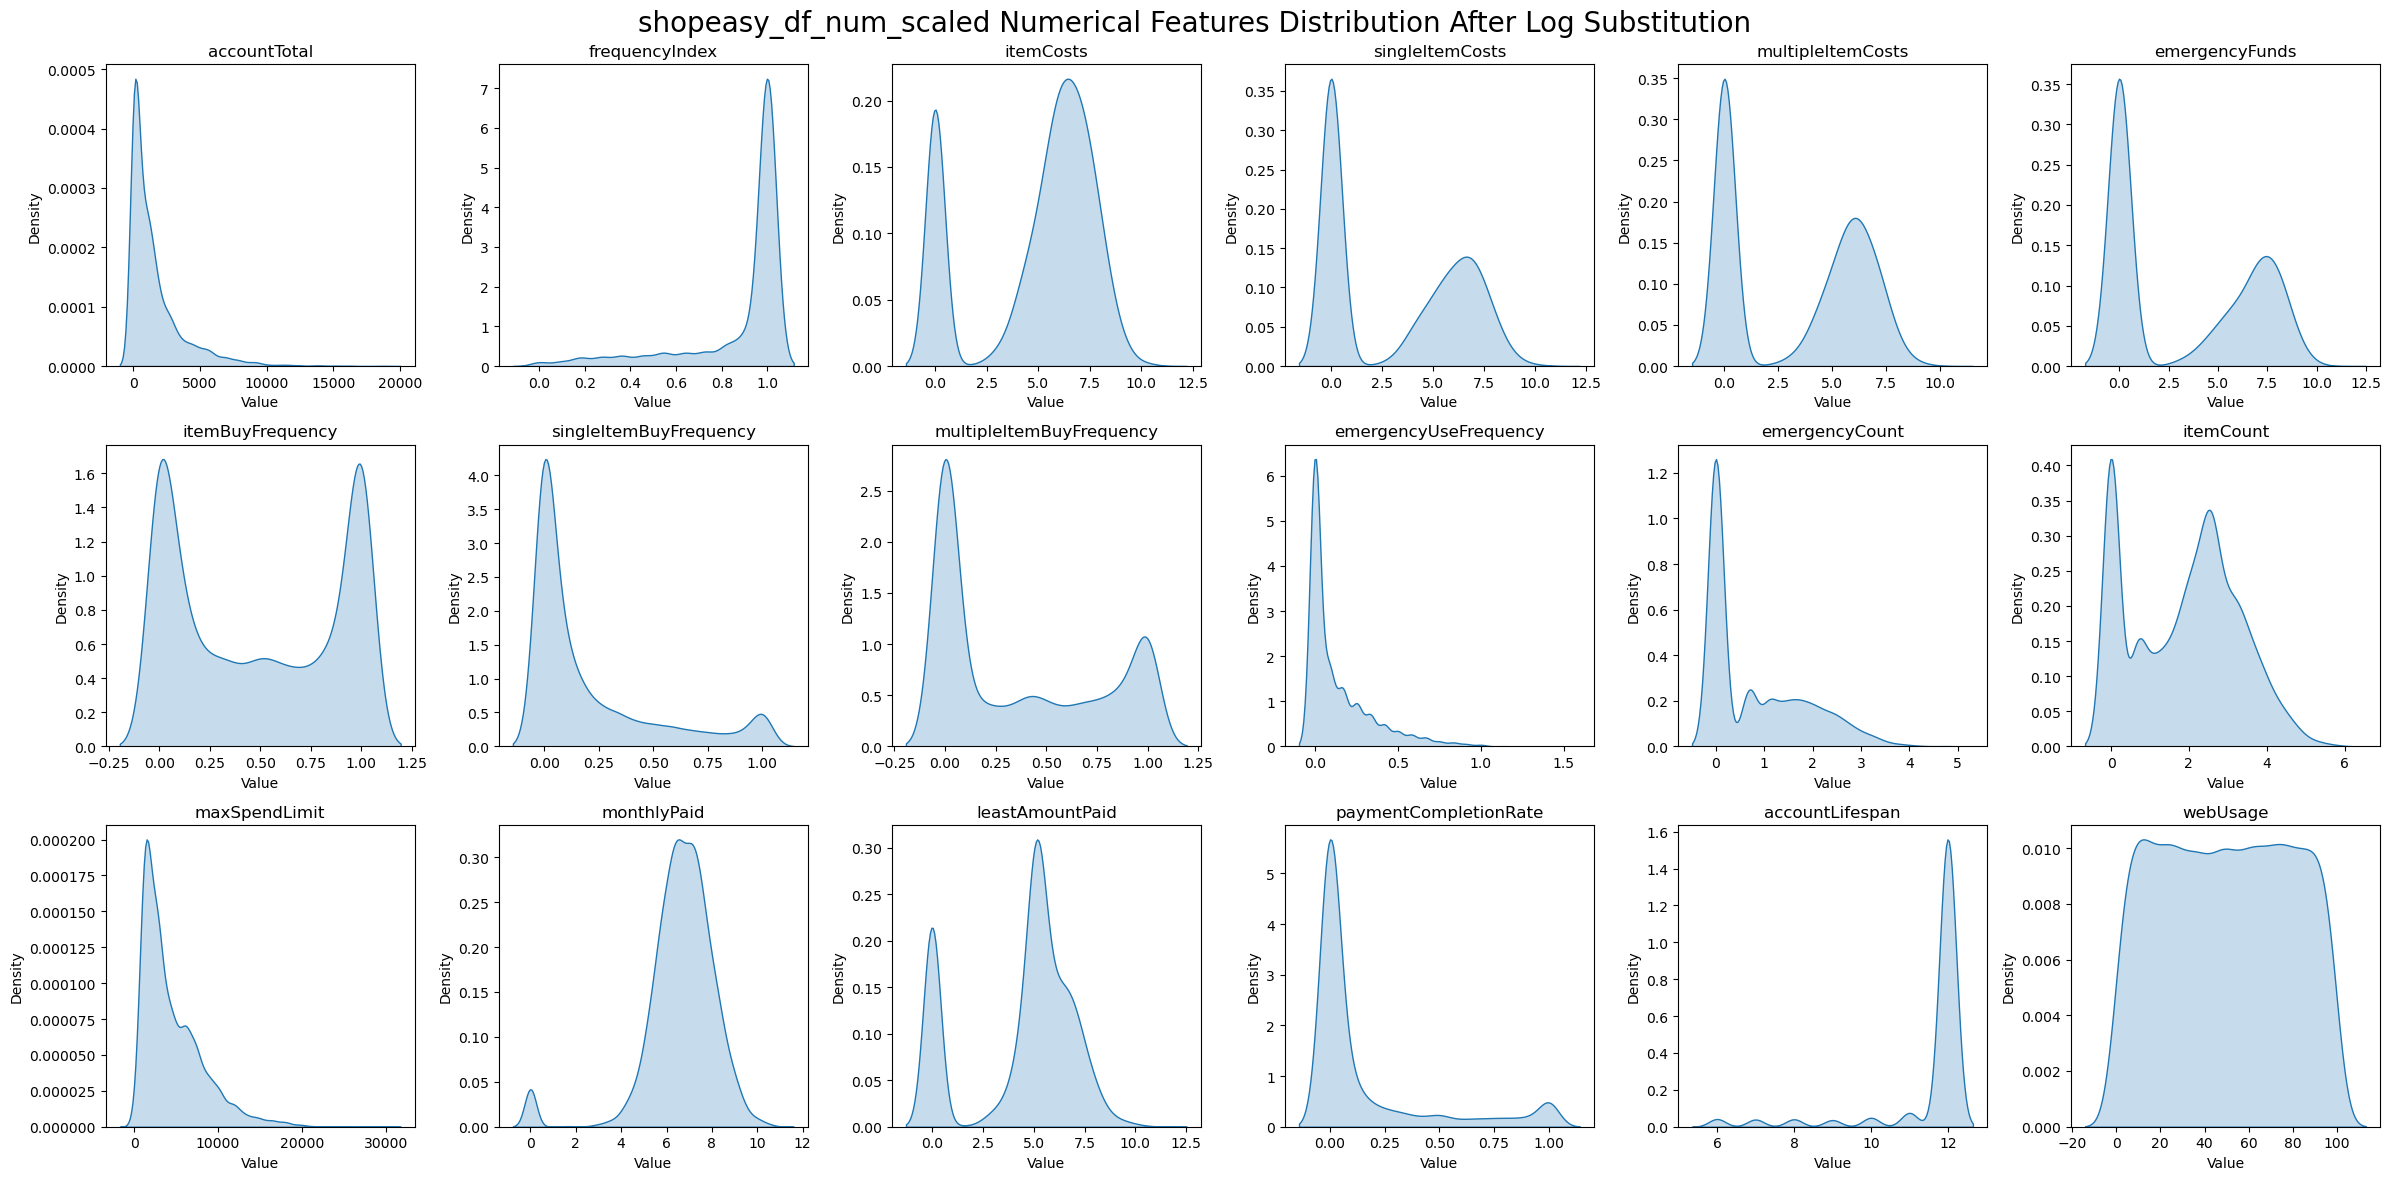

In [49]:
# Create scaled dataframe
shopeasy_df_num_scaled = shopeasy_df_encoded[numeric_columns].copy(deep=True)

# Replace heavy-tailed numerical features with their square root values
def improve_distribution_sqrt(df, right_skewed_columns):
    for column in right_skewed_columns:
        df[column] = np.sqrt(df[column])

# Replace heavy-tailed numerical features with their square log values
def improve_distribution_log(df, right_skewed_columns):
    for column in right_skewed_columns:
        min_value = np.min(df[column]) + 1 # avoid log of 0.0
        df[column] = np.log(df[column] + min_value)

# Improve distribution of right-skewed numerical features
right_skewed_columns = ['itemCosts', 'singleItemCosts', 'multipleItemCosts', 'emergencyFunds', 'emergencyCount', 'itemCount', 'monthlyPaid', 'leastAmountPaid']

improve_distribution_log(shopeasy_df_num_scaled, right_skewed_columns)
# improve_distribution_sqrt(shopeasy_df_num_scaled, right_skewed_columns)

# Plot distributions after log substitution
plot_distribution(shopeasy_df_num_scaled, 'shopeasy_df_num_scaled Numerical Features Distribution After Log Substitution')

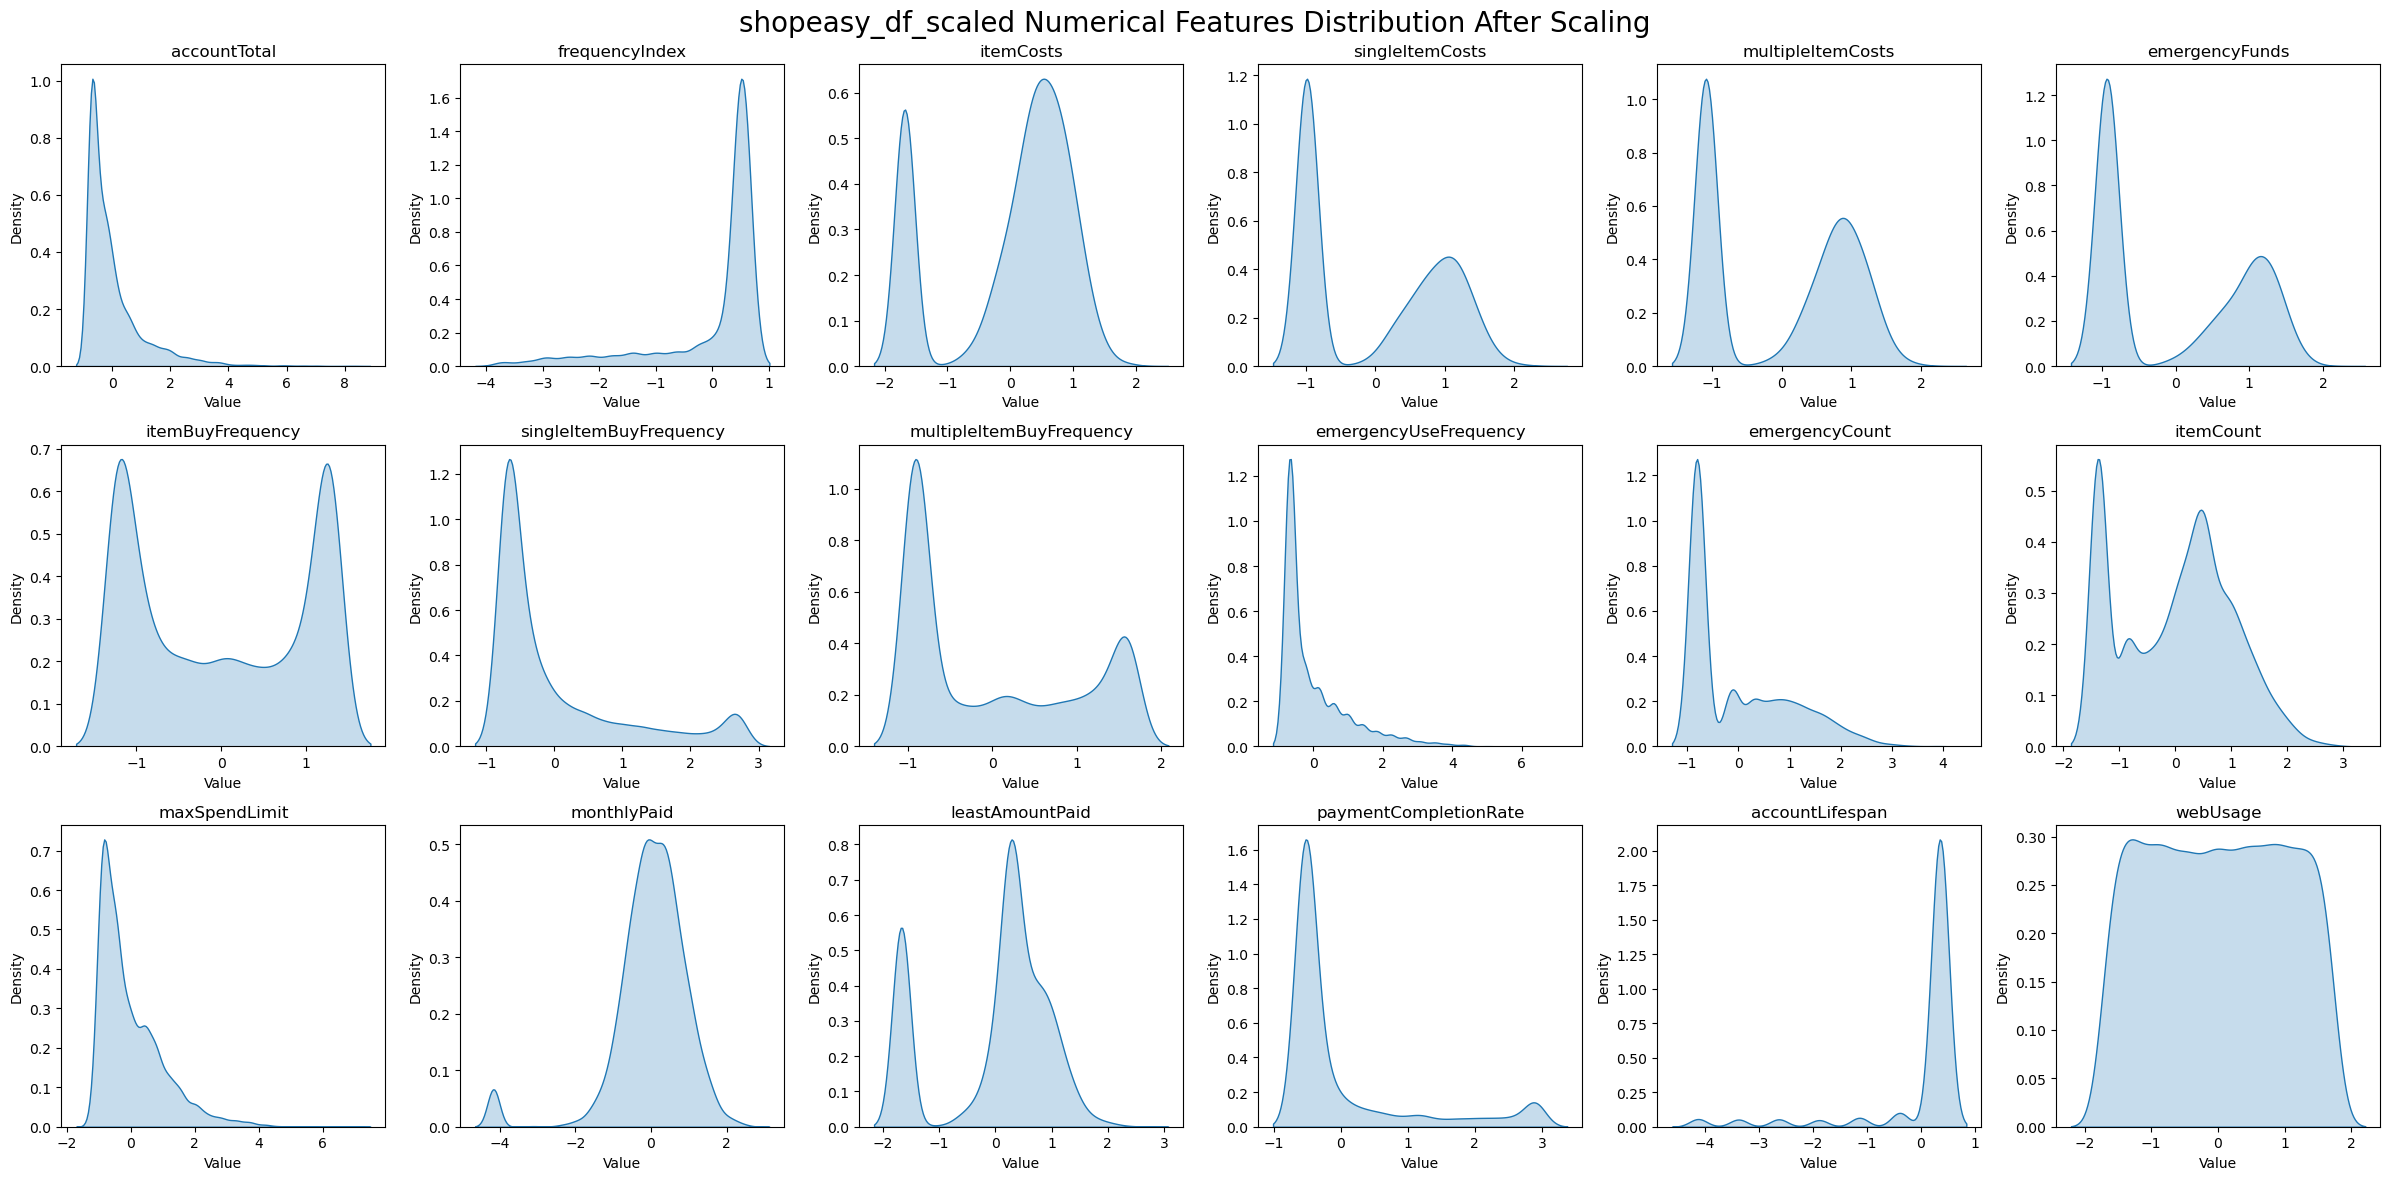

In [50]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
shopeasy_df_num_scaled[numeric_columns] = scaler.fit_transform(shopeasy_df_num_scaled[numeric_columns])

# Plot distributions after scaling
plot_distribution(shopeasy_df_num_scaled, 'shopeasy_df_scaled Numerical Features Distribution After Scaling')

## Distribution Analysis of Scaled Numerical Features

The kernel density estimate (KDE) plots below illustrate the distribution of each scaled numerical feature in the ShopEasy dataset after applying feature scaling. This visualization is key to understanding the shape of the data distribution, which informs the preprocessing steps and can influence the choice of clustering algorithms.

### Observations from KDE Plots:

- **Right-Skewed Distributions:**
  Most features exhibit a right-skewed distribution (e.g., `accountTotal`, `itemCosts`, `singleItemCosts`, `multipleItemCosts`, `emergencyFunds`, `monthlyPaid`, `leastAmountPaid`). This skewness indicates that a large number of users are clustered around the lower end of the spending spectrum, with fewer users making more expensive purchases.

- **Bimodal Distributions:**
  Features like `itemBuyFrequency`, `singleItemBuyFrequency`, and `multipleItemBuyFrequency` show bimodal distributions, suggesting two distinct groups of users based on their purchase frequencies.

- **Narrow and Peak Distributions:**
  `frequencyIndex`, `emergencyUseFrequency`, `emergencyCount`, and `accountLifespan` show very narrow and peaked distributions. These features may have discrete values or a large number of users concentrated in specific ranges.

- **Uniform Distribution:**
  The `webUsage` feature exhibits a nearly uniform distribution, which is an interesting contrast to other features and suggests that users are fairly evenly distributed in terms of their web usage scores.

### Implications for Clustering:

- **Feature Scaling Necessity:**
  The scaling of features is apparent, as all features are now on a comparable scale, which is essential for clustering algorithms that rely on distance metrics.

- **Outlier Identification:**
  The long tails in right-skewed distributions hint at the presence of outliers. Clustering algorithms can be sensitive to outliers, which may need to be addressed during preprocessing.

- **Cluster Tendency:**
  The varied shapes of distributions can influence the number of clusters formed and their cohesion. For instance, bimodal distributions might suggest a natural division into two clusters for those particular features.

By examining these KDE plots, we can infer that our dataset contains diverse purchasing behaviors, which supports the need for customer segmentation. The next steps will involve choosing appropriate clustering methods that can best capture the underlying patterns in this multi-dimensional data.


In [62]:
# Add categorical features to scaled dataframe
shopeasy_df_categ_data = shopeasy_df_encoded[categoric_columns].to_numpy()
shopeasy_df_scaled = np.concatenate((shopeasy_df_num_scaled, shopeasy_df_categ_data), axis=1)

shopeasy_df_scaled = pd.DataFrame(shopeasy_df_scaled, columns=all_columns)
shopeasy_df_scaled.describe()

accountTotal  frequencyIndex    itemCosts  singleItemCosts  \
count    8949.000000      8949.00000  8949.000000      8949.000000   
unique   8870.000000        43.00000  6203.000000      4014.000000   
top        -0.751704         0.51798    -1.680213        -0.987198   
freq       80.000000      6211.00000  2043.000000      4301.000000   

        multipleItemCosts  emergencyFunds  itemBuyFrequency  \
count         8949.000000     8949.000000       8949.000000   
unique        4452.000000     4322.000000         47.000000   
top             -1.087586       -0.930636          1.269742   
freq          3915.000000     4628.000000       2178.000000   

        singleItemBuyFrequency  multipleItemBuyFrequency  \
count              8949.000000                8949.00000   
unique               47.000000                  47.00000   
top                  -0.678716                  -0.91709   
freq               4301.000000                3914.00000   

        emergencyUseFrequency  ...  maxSpendLimit  monthlyPaid  \
count             8949.000000  ...     8949.00000  8949.000000   
unique              54.000000  ...      205.00000  8710.000000   
top                 -0.675294  ...       -0.41072    -4.163779   
freq              4628.000000  ...      784.00000   240.000000   

        leastAmountPaid  paymentCompletionRate  accountLifespan     webUsage  \
count        8949.00000            8949.000000      8949.000000  8949.000000   
unique       6553.00000              47.000000         7.000000   100.000000   
top            -1.67234              -0.525588         0.360541     0.505913   
freq         2045.00000            5902.000000      7584.000000   115.000000   

        location_Chicago  location_Los Angeles location_New York  \
count               8949                  8949              8949   
unique                 2                     2                 2   
top                False                 False             False   
freq                5958                  5988              5952   

       accountType_encoded  
count                 8949  
unique                   3  
top                      0  
freq                  2999  

[4 rows x 22 columns]

In [52]:
# # Selecting columns to scale (excluding one-hot encoded and label encoded columns)
# columns_to_scale = [col for col in shopeasy_df.columns if (col != 'location' and col != 'accountType')]

# # Initializing StandardScaler
# scaler = StandardScaler()

# # Creating a new DataFrame for the scaled version
# shopeasy_df_scaled = shopeasy_df_encoded.copy()
# shopeasy_df_scaled[columns_to_scale] = scaler.fit_transform(shopeasy_df_encoded[columns_to_scale])

# # Displaying the first few rows of the scaled and encoded dataframe
# shopeasy_df_scaled.head()

# Univariate Analysis

This code creates a grid of histograms for the numeric columns in a DataFrame `shopeasy_df`.

- It first selects the numeric columns by using `select_dtypes(include=['float64', 'int64'])`.
- The number of rows and columns for the subplot grid is determined based on the total number of numeric columns.
- A new figure is created with a size that depends on the number of subplots.
- A loop is used to create a subplot for each numeric column. For each subplot:
  - A histogram is created for the current column, with a Kernel Density Estimate (KDE) plot overlaid.
  - The title of the subplot is set to 'Distribution of {column}'.
- `plt.tight_layout()` is used to adjust the subplot parameters so that the subplot(s) fit into the figure area.
- Finally, the figure is displayed with `plt.show()`.

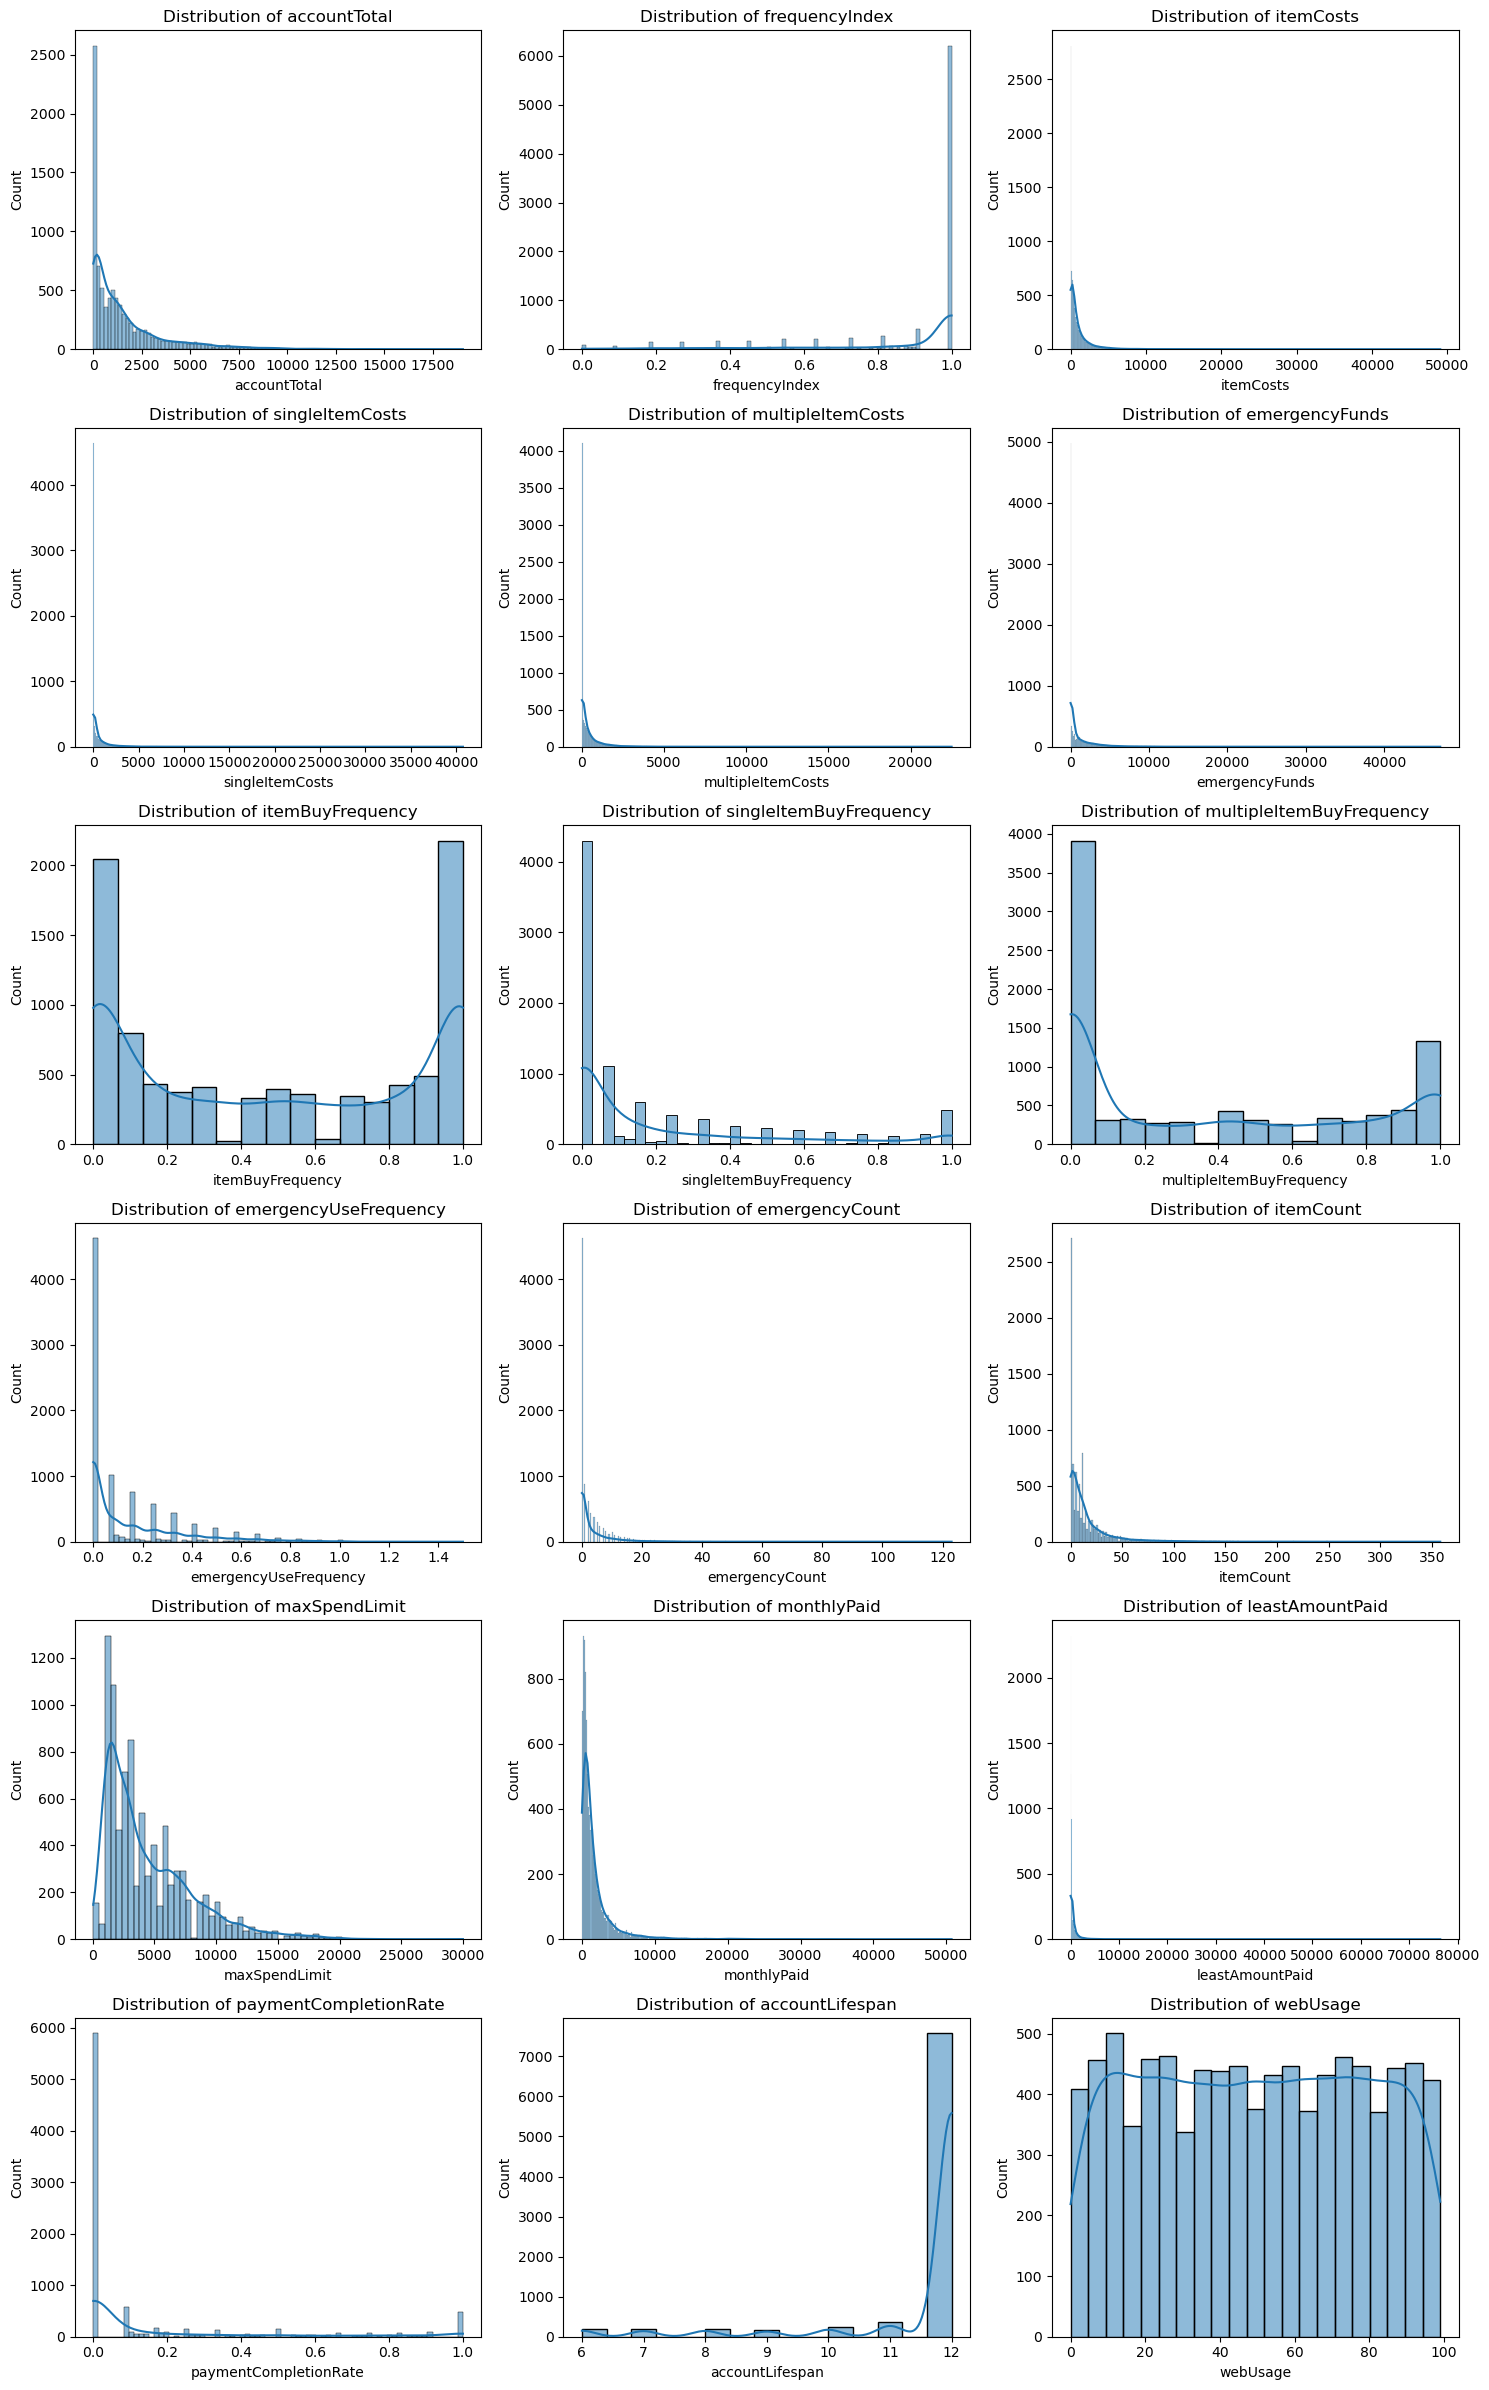

In [53]:
# Selecting numerical features
numerical_features = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows/columns for the subplot grid
num_features = len(numerical_features)
ncols = 3
nrows = num_features // ncols + (num_features % ncols > 0)

# Creating subplots
plt.figure(figsize=(15, nrows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

## Distribution Analysis of Numerical Features

The histograms above present the distribution of each numerical feature in the ShopEasy dataset. These plots are fundamental for understanding the data's distribution, which is essential for data preprocessing and provides insights into feature characteristics.

### Observations from Histograms:

- **`accountTotal`, `itemCosts`, `singleItemCosts`, `multipleItemCosts`, `emergencyFunds`, `monthlyPaid`, `leastAmountPaid`:**
  These features display highly right-skewed distributions, indicating that a majority of the users have lower values with fewer users having very high values. Such distributions are common in financial data where only a small fraction of users engage in high-value transactions.

- **`frequencyIndex`, `itemBuyFrequency`, `singleItemBuyFrequency`, `multipleItemBuyFrequency`, `emergencyUseFrequency`:**
  These features appear to have bimodal or multimodal distributions, suggesting the presence of distinct user groups with different shopping frequencies.

- **`emergencyCount`, `itemCount`:**
  These features show a large number of occurrences at the lower end and very few at the high end, again indicating that most users make fewer transactions or purchases.

- **`maxSpendLimit`:**
  The distribution shows that while many users have a lower spend limit, there is a wide range of limits set by ShopEasy, reflecting the diversity in user profiles and potentially their creditworthiness.

- **`paymentCompletionRate`:**
  This feature has a peak at the lower end, suggesting that many users may not complete payments or prefer partial payments. There's also a smaller peak near 1, indicating another group of users who frequently complete their payments.

- **`accountLifespan`:**
  A large number of users have been on the platform for a similar duration, evidenced by the sharp peak, which could be due to a successful campaign in a specific period that attracted many new users.

- **`webUsage`:**
  The nearly uniform distribution of the `webUsage` feature contrasts with the other features, suggesting that web usage is spread relatively evenly across different intervals.

## What about categorical features? ...

This code creates a grid of bar plots for the specified categorical columns in a DataFrame `shopeasy_df`.

- It first specifies the categorical columns to plot.
- The number of rows and columns for the subplot grid is determined based on the total number of categorical columns.
- A new figure is created with a size that depends on the number of subplots.
- A loop is used to create a subplot for each categorical column. For each subplot:
  - A bar plot is created for the current column, showing the count of each category. The categories are ordered by their frequency.
  - The title of the subplot is set to 'Frequency of {column}'.
- `plt.tight_layout()` is used to adjust the subplot parameters so that the subplot(s) fit into the figure area.
- Finally, the figure is displayed with `plt.show()`.

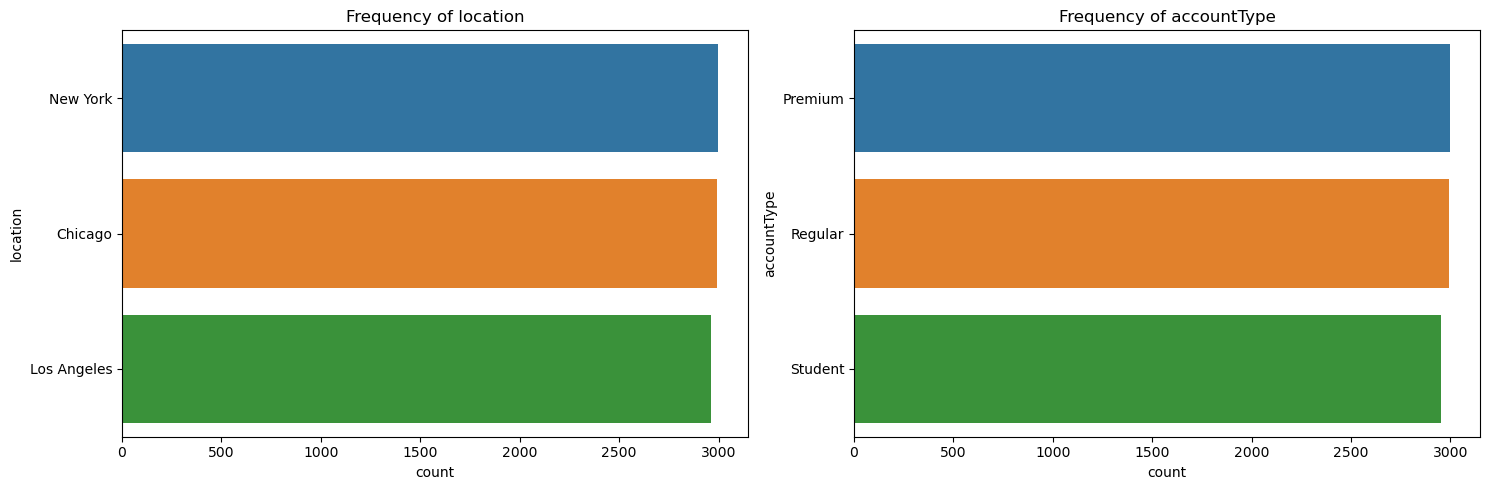

In [54]:
categorical_features = ['location', 'accountType']

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Creating subplots for the selected categorical variables
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=shopeasy_df, order=shopeasy_df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


# Bivariate Analysis

## Key Feature Relationships for Customer Behavior Insights

In our analysis, we focus on pairs of features that are likely to provide the most valuable insights into customer behavior and ShopEasy's business strategy. By examining the interplay between these pairs, we can derive actionable insights that may enhance personalized marketing efforts, inventory management, credit policies, and customer loyalty programs.

### Analyzed Feature Pairs:


## 1. **AccountTotal and FrequencyIndex:**
   - This pair is instrumental in revealing the dynamics between a user's total expenditure on the platform and their shopping frequency. We hypothesize that a positive correlation might exist — users who shop more frequently could be contributing a significant portion of ShopEasy's revenue.
   - Insight from this analysis could inform the design of loyalty programs, ensuring they are optimally structured to reward and incentivize the most valuable and consistent shoppers.


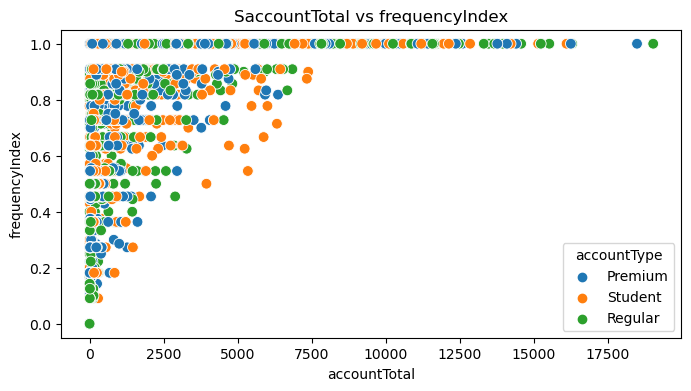

In [55]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='accountTotal',y='frequencyIndex',
    hue='accountType',s=60
)
plt.title('SaccountTotal vs frequencyIndex')
plt.show()

The scatter plot visualizes the relationship between total spending (`accountTotal`) and shopping frequency (`frequencyIndex`) across different account types. Each point represents a user, with the color indicating their account type: Premium (blue), Student (orange), or Regular (green).

### Observations:

- **Variation Across Account Types:**
  - Premium account holders (blue) are scattered across the entire range of `accountTotal`, displaying both high and low total spending, yet most maintain a high `frequencyIndex`, indicating consistent engagement with the platform.
  - Student accounts (orange) tend to cluster towards the lower end of `accountTotal`, which aligns with the expectation of limited spending power. They also exhibit a wider range of `frequencyIndex`, suggesting varying levels of engagement.
  - Regular accounts (green) are the most numerous and show a broad distribution in both `accountTotal` and `frequencyIndex`, reflecting the diverse nature of this customer segment.

- **High Spending, Not Necessarily High Frequency:**
  - There is a concentration of data points at higher `frequencyIndex` values across all account types, indicating a significant number of users shop frequently regardless of their total spend.
  - Notably, high total spending does not always correlate with high shopping frequency, highlighting that ShopEasy has a segment of customers who spend large amounts in fewer transactions.

- **Dense Clusters and Outliers:**
  - Dense clusters near the origin suggest a large number of users with low total spending and frequency. This could represent new users or those who use ShopEasy infrequently.
  - Outliers, particularly in the Premium segment, indicate users with very high total spending but varied shopping frequencies. These users could represent high-value target customers for personalized marketing campaigns.

### Strategic Implications:

- **Tailored Marketing:**
  - Understanding the spending and frequency behaviors enables ShopEasy to tailor marketing efforts. For example, engaging premium users with high spend but low frequency through loyalty rewards or special offers could increase their shopping frequency.
  
- **Customer Loyalty Programs:**
  - The plot suggests the potential for developing tiered loyalty programs that reward users based on their spending levels and shopping frequency, which can encourage increased spending and engagement.

- **Student Engagement:**
  - Students show potential for increased platform engagement. Targeted promotions or partnerships with educational institutions could be a strategic move to boost their spending and frequency indices.

## 2. **ItemCosts and ItemBuyFrequency:**
   - By comparing the aggregate cost of items purchased with the frequency of transactions, we can identify patterns such as whether users making frequent smaller purchases contribute more to the revenue than those making infrequent larger purchases.
   - This analysis is crucial for inventory stocking and management, as well as for crafting personalized product recommendations that resonate with users' purchasing rhythms.


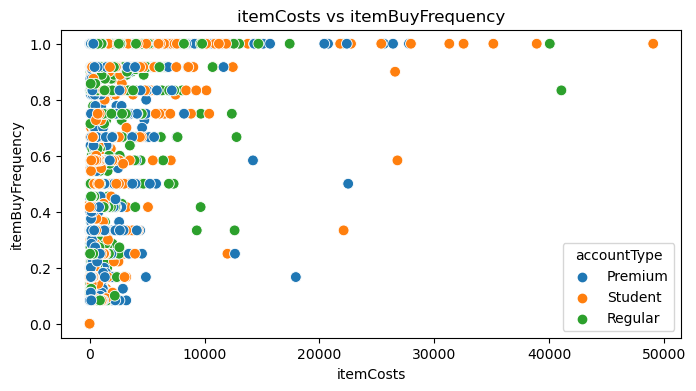

In [56]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='itemCosts',y='itemBuyFrequency',
    hue='accountType',s=60
)
plt.title('itemCosts vs itemBuyFrequency')
plt.show()

The scatter plot provides insights into how the total cost of items purchased (`itemCosts`) correlates with the frequency of purchases (`itemBuyFrequency`) for different types of ShopEasy accounts. The color-coded points represent individual users: Premium (blue), Student (orange), and Regular (green).

### Detailed Observations:

- **Correlation between Costs and Frequency:**
  - A visual inspection suggests that for many users, especially those with regular accounts (green), higher item costs do not necessarily align with higher purchase frequencies. This pattern may indicate that users are making significant one-off purchases rather than engaging in regular, smaller transactions.

- **Premium Account Spending:**
  - Premium users (blue) appear across a broad range of `itemCosts` and exhibit varying `itemBuyFrequency`. Notably, there are premium users at the high end of the cost spectrum, which could indicate luxury or bulk purchases. Their wide distribution across the frequency index might reflect the diversity of shopping behaviors within this group.

- **Student Purchase Patterns:**
  - Student accounts (orange) mostly cluster at lower `itemCosts`, which is consistent with more budget-conscious spending habits. However, there is a subgroup of students with higher purchase frequencies, suggesting that while their spending per transaction may be lower, they engage with the platform regularly.

- **Regular User Behavior:**
  - The largest segment, regular users (green), show a significant concentration in the lower left quadrant of the plot, representing low spend and frequency. However, there's a noticeable spread towards higher frequency and higher costs, illustrating a varied customer base with different shopping patterns within this group.

### Strategic Business Insights:

- **Customer Spending Habits:**
  - This analysis is pivotal for understanding customer spending habits. For instance, users who spend more per transaction but shop less frequently might benefit from incentives that encourage regular engagement, such as subscription models or loyalty points for consistent purchases.

- **Product Pricing and Promotion:**
  - The scatter plot informs product pricing and promotional strategies. Identifying products that drive frequent purchases can lead to targeted promotions that boost sales volume, while understanding higher-cost purchase behaviors can guide premium pricing strategies.

- **Engagement Strategies:**
  - For regular and student users, strategies that encourage higher spending per transaction may be beneficial. This could include bundle deals, volume discounts, or financing options that make larger purchases more accessible.

- **Customized User Experience:**
  - The data supports the need for a customized user experience. Personalization algorithms could be deployed to tailor the shopping experience for users based on their identified spending and purchase frequency patterns, enhancing user satisfaction and potentially increasing sales.


## 3. **AccountType and PaymentCompletionRate:**
   - Investigating the payment completion rate across different account types (Regular, Premium, Student) sheds light on the payment reliability of each segment. This knowledge is key for assessing the credit risk profile of different user groups.
   - Findings here could guide tailored financial product offerings, such as installment plans or credit extensions, and help in designing promotions that encourage full payment completion.

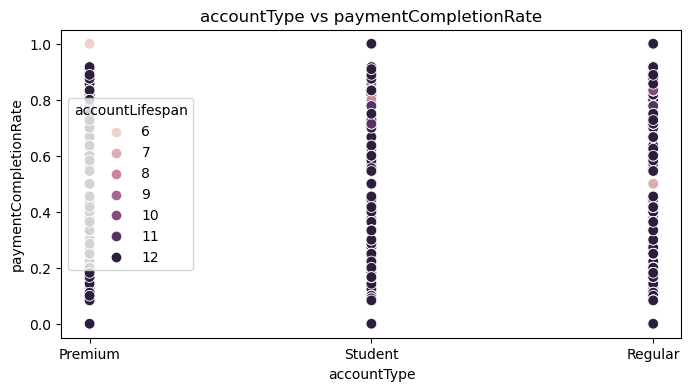

In [57]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='accountType',y='paymentCompletionRate',
    hue='accountLifespan',s=60
)
plt.title('accountType vs paymentCompletionRate')
plt.show()

The scatter plot delineates the `paymentCompletionRate` across different `accountType` categories (Premium, Student, Regular), with the color gradient reflecting the `accountLifespan`. This visualization helps in understanding how the type of account and the duration of the relationship with ShopEasy relate to the reliability of payment completions.

### Insights from the Scatter Plot:

- **Distribution Across Account Types:**
  - Users with Premium accounts appear to have a higher rate of payment completion, which may be attributable to the additional benefits and services they receive, encouraging them to complete payments promptly.
  - Student and Regular account holders display a wide range of payment completion rates, from full to partial payments. This variation could be indicative of differing financial situations and spending behaviors within these segments.

- **Account Lifespan Gradient:**
  - The gradient color representing `accountLifespan` shows that users with longer relationships with ShopEasy (darker shades) are present across all levels of payment completion. This indicates that the duration of the account does not necessarily predict payment behavior.

- **Loyalty and Payment Behavior:**
  - Interestingly, there is not a clear trend that longer account lifespans correlate with higher payment completion rates. This could suggest that factors other than loyalty, such as financial incentives or account features, might have a stronger influence on payment completion.

### Strategic Implications for ShopEasy:

- **Customized Credit Incentives:**
  - The varying payment completion rates across account types suggest the potential for introducing customized credit incentives. For example, providing tailored payment plans or credit options might improve payment completion rates, especially for students and regular users who show a wider range of payment behaviors.

- **Loyalty Program Optimization:**
  - Despite the lack of a clear correlation between account lifespan and payment completion rate, loyalty programs can be optimized to encourage more consistent payment behaviors. Targeted rewards for completing payments could be an effective strategy.

- **Risk Management:**
  - Understanding the payment completion rate across different account types can also aid in risk management. ShopEasy can develop strategies to mitigate the risk of non-completion and tailor services to encourage full payment from segments showing lower completion rates.

- **Engagement and Retention:**
  - This plot emphasizes the need for ongoing engagement and retention strategies that go beyond the length of account holding. Focusing on personalized experiences that cater to the financial needs and habits of each segment could lead to better payment completion rates.


## 4. **EmergencyFunds and EmergencyUseFrequency:**
   - Understanding how users utilize their emergency funds in correlation with the frequency of such usage offers insights into consumer behavior under different purchasing conditions.
   - This data can reveal the impact of offering a financial cushion on customer loyalty and purchasing frequency, potentially validating the emergency fund as a feature that not only provides peace of mind to the users but also benefits ShopEasy's sales metrics.

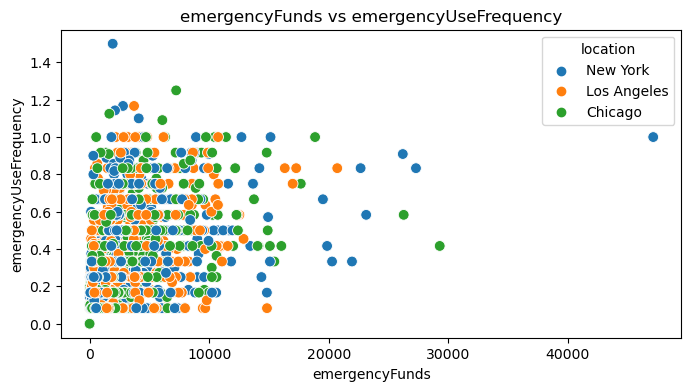

In [58]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='emergencyFunds',y='emergencyUseFrequency',
    hue='location',s=60
)
plt.title('emergencyFunds vs emergencyUseFrequency')   
plt.show()

This scatter plot compares the amount of emergency funds users have set aside (`emergencyFunds`) against the frequency with which they use these funds (`emergencyUseFrequency`). Each point represents a user, and the color coding corresponds to their location: New York (blue), Los Angeles (orange), and Chicago (green).

### Observations from the Data:

- **Distribution of Emergency Funds:**
  - There's a wide distribution of `emergencyFunds` across all three locations, with most users having a lower amount set aside. Notably, a few users in each location have a significantly higher amount of emergency funds, which could indicate a more robust financial safety net or a preference for liquidity.

- **Use of Emergency Funds:**
  - The `emergencyUseFrequency` is relatively low for the majority of users across all locations, suggesting that while the option to use emergency funds is valued, the actual usage is infrequent.

- **Location-Based Patterns:**
  - Users from New York (blue) and Los Angeles (orange) show a similar distribution in both `emergencyFunds` and `emergencyUseFrequency`, indicating comparable financial behavior in terms of emergency fund usage in these cities.
  - Chicago users (green) are fewer in number on this plot, and while their data points are also spread across the range of `emergencyFunds`, there is less variation in their `emergencyUseFrequency`.

### Strategic Business Insights:

- **Risk Aversion by Location:**
  - The scatter plot may reflect different levels of risk aversion, with users having more emergency funds potentially being more conservative with their finances.

- **Financial Product Tailoring:**
  - Understanding the relationship between emergency fund balances and usage frequency can help ShopEasy tailor financial products. For example, users with high emergency funds but low usage might be interested in investment opportunities, whereas users with lower balances might benefit from saving incentives.

- **Location-Specific Strategies:**
  - Despite the similarities in financial behavior observed in New York and Los Angeles, localized strategies could be developed to encourage more frequent use of emergency funds, aligning with regional economic conditions and consumer confidence levels.

- **Engagement Opportunities:**
  - The infrequent use of emergency funds highlights an opportunity to engage users with financial planning tools or educational content to help them make the most of their emergency reserves.


### Implications:

Each of these feature pairs has been chosen for their potential to unlock a deeper understanding of our customers' interaction with ShopEasy's platform. The insights gained can directly impact strategic decisions across marketing, inventory management, financial services, and platform feature enhancements. By identifying and acting on these insights, ShopEasy can continue to innovate in providing a superior customer experience that not only meets but anticipates customer needs.


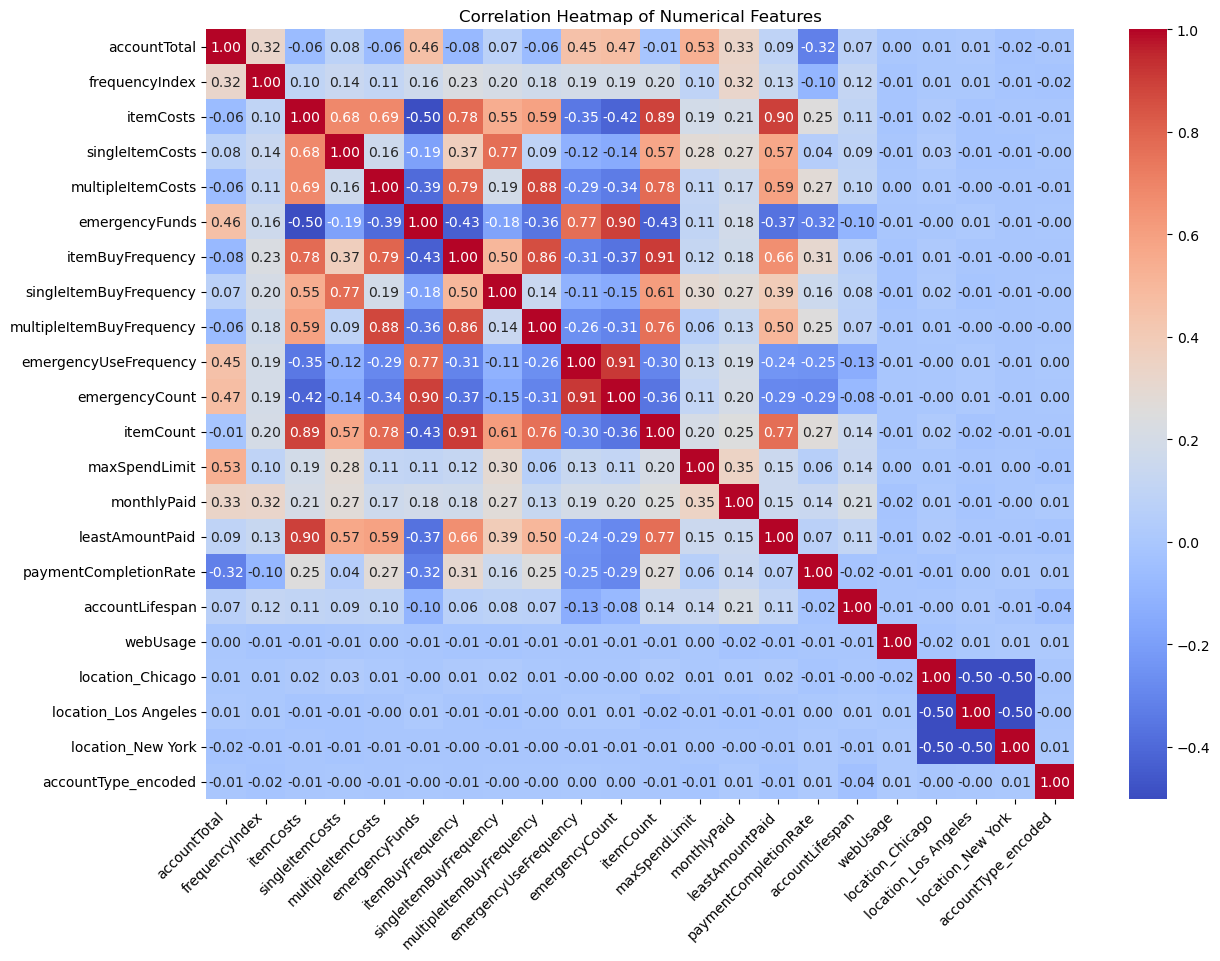

In [63]:
plt.figure(figsize=(14, 10))
sns.heatmap(shopeasy_df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [68]:
correlation_matrix = shopeasy_df_scaled.corr()

# Display the correlation matrix
print(correlation_matrix)

                          accountTotal  frequencyIndex  itemCosts  \
accountTotal                  1.000000        0.322335  -0.064734   
frequencyIndex                0.322335        1.000000   0.096494   
itemCosts                    -0.064734        0.096494   1.000000   
singleItemCosts               0.084010        0.140200   0.683469   
multipleItemCosts            -0.061945        0.112387   0.685340   
emergencyFunds                0.459008        0.164776  -0.496541   
itemBuyFrequency             -0.078054        0.229440   0.781709   
singleItemBuyFrequency        0.073114        0.202295   0.547287   
multipleItemBuyFrequency     -0.063267        0.175869   0.592360   
emergencyUseFrequency         0.449246        0.192022  -0.349026   
emergencyCount                0.468868        0.193710  -0.416757   
itemCount                    -0.014356        0.200618   0.888964   
maxSpendLimit                 0.531283        0.095843   0.189628   
monthlyPaid                   0.33

## Interpretation of Feature Correlations

In our quest to personalize user experiences on ShopEasy, we've analyzed the correlation matrix to identify patterns in customer spending and behavior. Here are the most telling high correlations and the more unexpected ones, alongside their strategic implications:

### High Correlations:

1. **Item Buy Frequency and Item Count (0.91):**
   - High-frequency buyers are also purchasing a large number of items. ShopEasy can target these users with loyalty programs to further encourage repeat purchases.

2. **Item Costs and Least Amount Paid (0.90):**
   - The close relationship between total item costs and the least amount paid indicates that those making larger purchases are often the same users making significant one-off purchases. Recommending higher-value items to these customers could enhance their shopping experience.

3. **Emergency Funds and Emergency Count (0.90):**
   - Users with more in emergency funds tend to use them frequently. This insight can guide the creation of incentives for topping up and using emergency funds, which can drive user engagement.

4. **Multiple Item Costs and Multiple Item Buy Frequency (0.88):**
   - Customers frequently purchasing on installment also spend more on these items. This indicates a segment that could benefit from and be responsive to financing options or installment plans.


### Enhanced Personalization and Service Design:

These correlations provide a roadmap for designing more nuanced and effective user engagement strategies. By understanding and anticipating user needs, ShopEasy can create a more personalized and satisfying shopping experience. For example, installment payment options can be fine-tuned, emergency fund features can be optimized, and the product recommendation engine can be adjusted to match user spending patterns more closely.


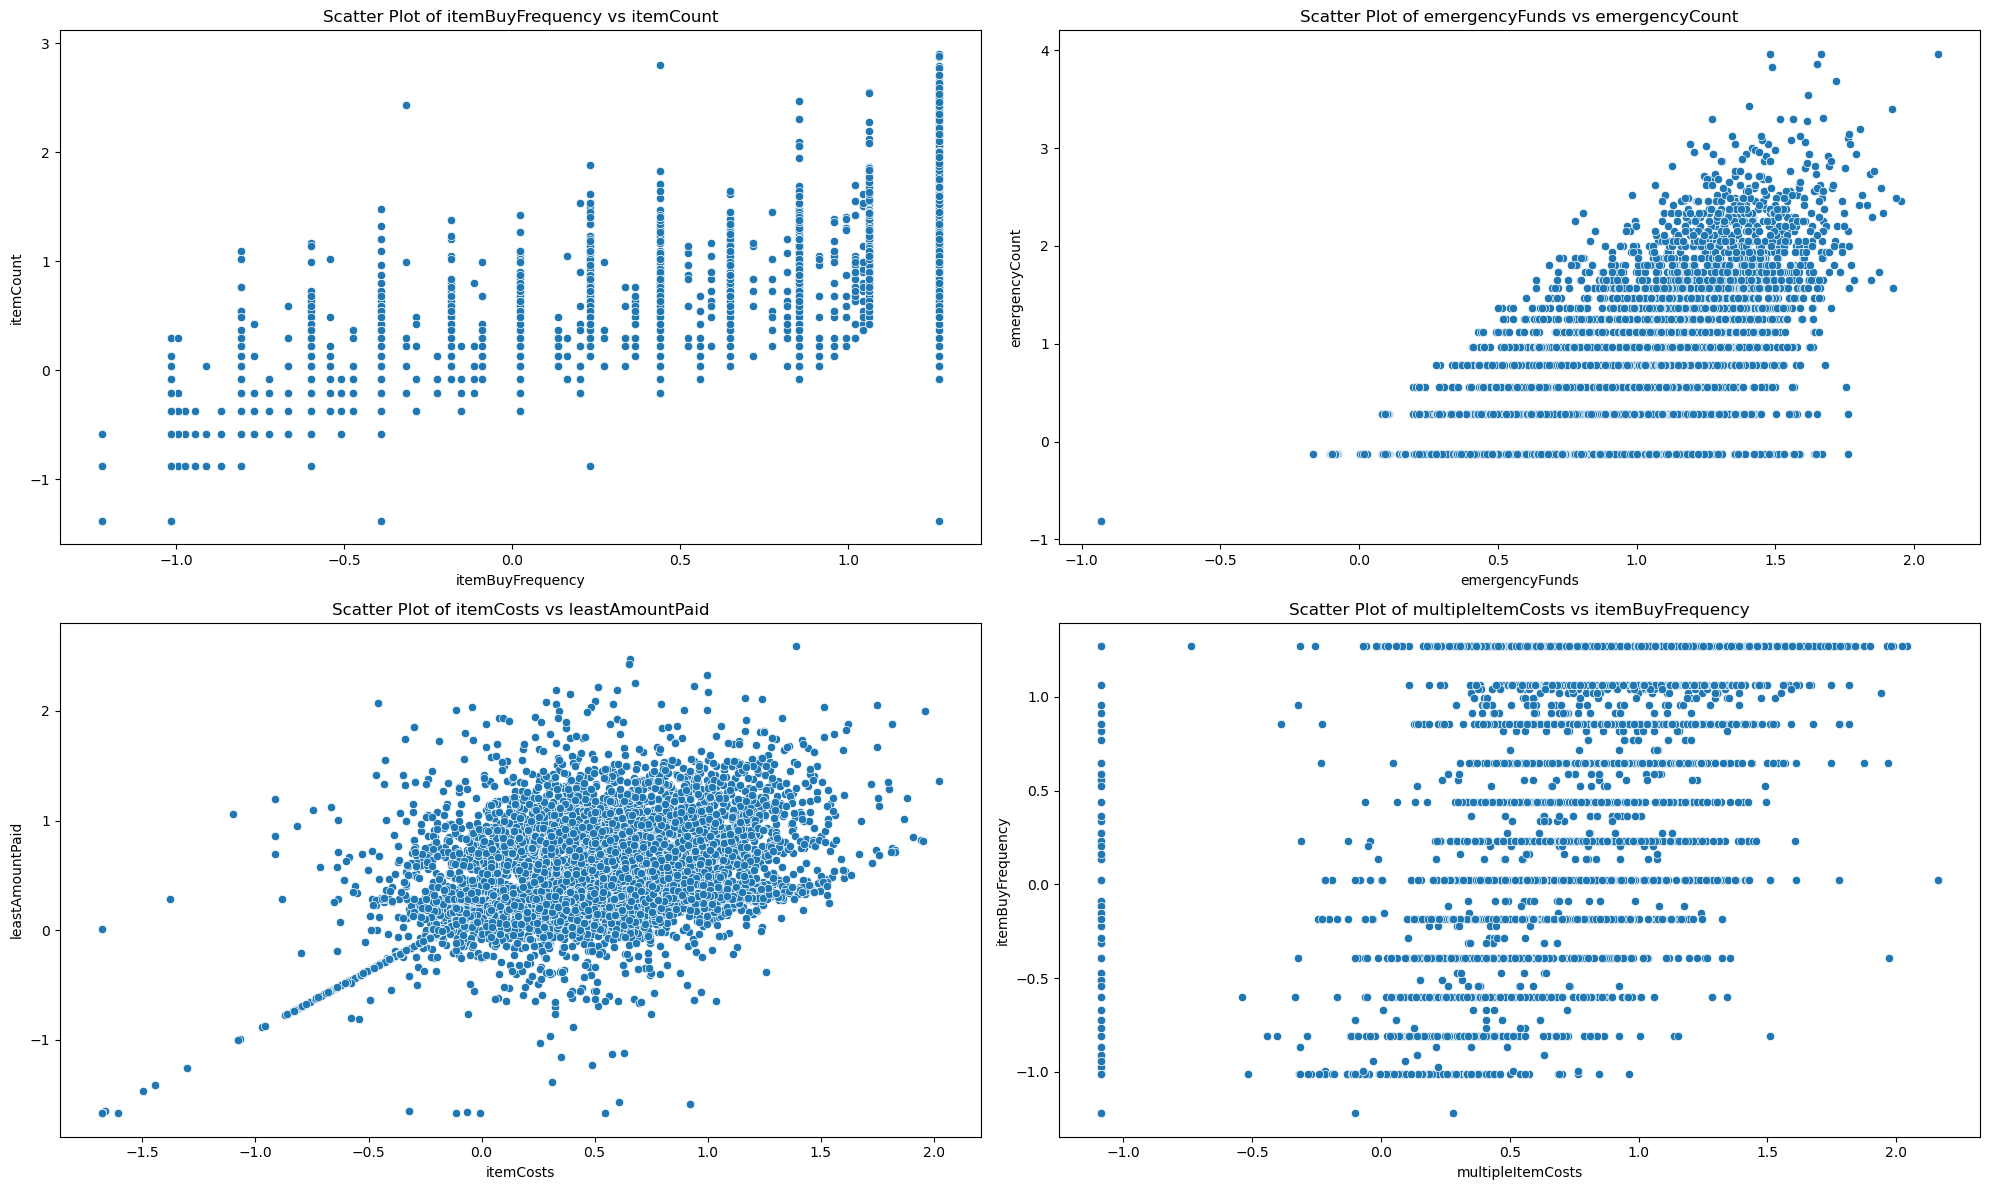

In [69]:
# Sample pairs of features with high correlations
high_corr_pairs = [('itemBuyFrequency', 'itemCount'), ('emergencyFunds','emergencyCount'), ('itemCosts', 'leastAmountPaid'), ('multipleItemCosts', 'itemBuyFrequency')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(high_corr_pairs)
ncols = 2
nrows = num_pairs // ncols + (num_pairs % ncols > 0)  # Calculate the number of rows

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(high_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df_scaled, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

## Unpacking Surprising Correlations

1. **Account Total and Emergency Funds (0.46):**
   - It's interesting to note that higher overall spending correlates with more substantial emergency funds. This relationship may suggest a trust in the platform's financial services among active users.

2. **Max Spend Limit and Account Total (0.53):**
   - Users who spend more are often granted a higher spending limit, which aligns with loyalty and trust-building practices. It's a testament to ShopEasy's commitment to rewarding loyal customers.

3. **Payment Completion Rate and Account Total (-0.32):**
   - The inverse correlation between total spend and payment completion rate suggests that higher spenders may be taking advantage of payment flexibility, such as installment plans.

4. **Emergency Use Frequency and Emergency Funds (0.77):**
   - Users with larger emergency funds are using them frequently, which might reflect a customer base that values the liquidity and security provided by ShopEasy.

These correlations provide actionable insights into customer behavior, which ShopEasy can leverage to segment customers effectively and offer personalized services that resonate with their usage patterns and financial behaviors.

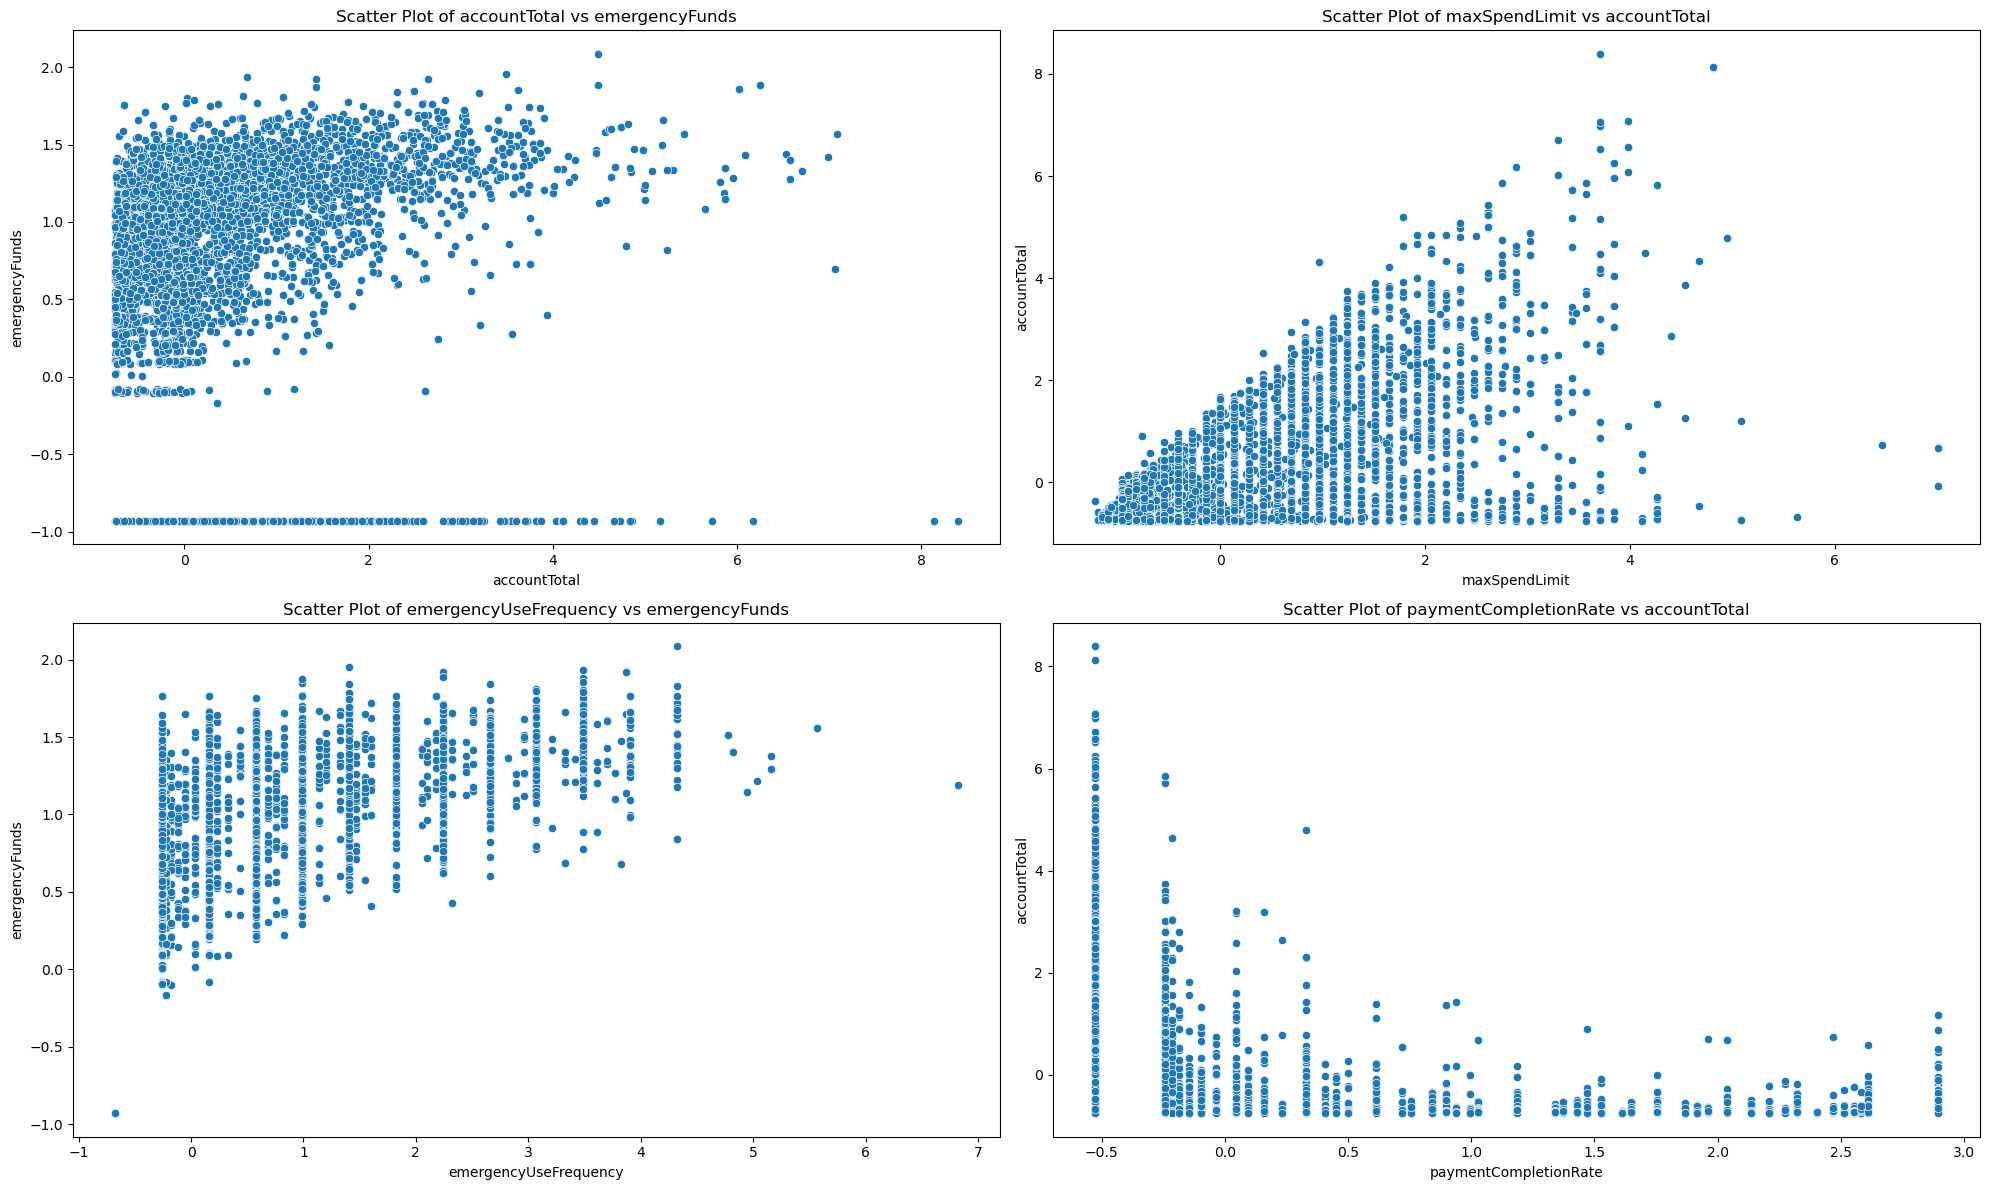

In [71]:
# Sample pairs of features with surprising correlations
surprising_corr_pairs = [('accountTotal', 'emergencyFunds'), ('maxSpendLimit', 'accountTotal'),  ('emergencyUseFrequency', 'emergencyFunds'), ('paymentCompletionRate', 'accountTotal')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(surprising_corr_pairs)
ncols = 2 

# Determine the number of rows/columns for the subplot grid
nrows = num_pairs // ncols + (num_pairs % ncols > 0)

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))
axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(surprising_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df_scaled, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

## Selection of Features for Pairplot Visualization

In order to deepen our understanding of ShopEasy's customer behaviors and tailor segmentation strategies, we select a set of features for pairplot visualization. The pairplot will enable us to observe the distribution of individual features and the relationships between pairs of features. The following eight features are chosen based on their strong correlations and strategic relevance to ShopEasy's goals:

1. **`itemBuyFrequency`**: Integral for assessing how often users engage in purchasing, and its correlation with other features provides insights into buying patterns.

2. **`itemCount`**: To visualize the volume of items purchased, which is closely linked to purchase frequency and can indicate customer loyalty and market basket size.

3. **`singleItemCosts`**: Offers a view into the expenditure on individual items, showing the influence of single purchases on total spending.

4. **`multipleItemCosts`**: Since installment-based purchases are a key component of customer behavior, understanding this relationship is vital for financial service offerings.

5. **`emergencyFunds`**: Observing how users allocate funds for emergencies and how this correlates with their actual use can inform financial product development.

6. **`emergencyCount`**: Important for visualizing the usage pattern of emergency funds, which can reflect financial management behaviors among users.

7. **`leastAmountPaid`**: By examining this feature alongside others, we can infer aspects of user spending habits and the scale of transactions.

8. **`paymentCompletionRate`**: Given its unexpected inverse relationship with overall spending, it's valuable to examine how payment behaviors vary across the customer base.

These features are pivotal in painting a comprehensive picture of customer interactions with ShopEasy's platform. The pairplot is expected to uncover nuanced relationships and user segments, facilitating the creation of more targeted and effective marketing campaigns, and enhancing customer experience personalization.


c:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


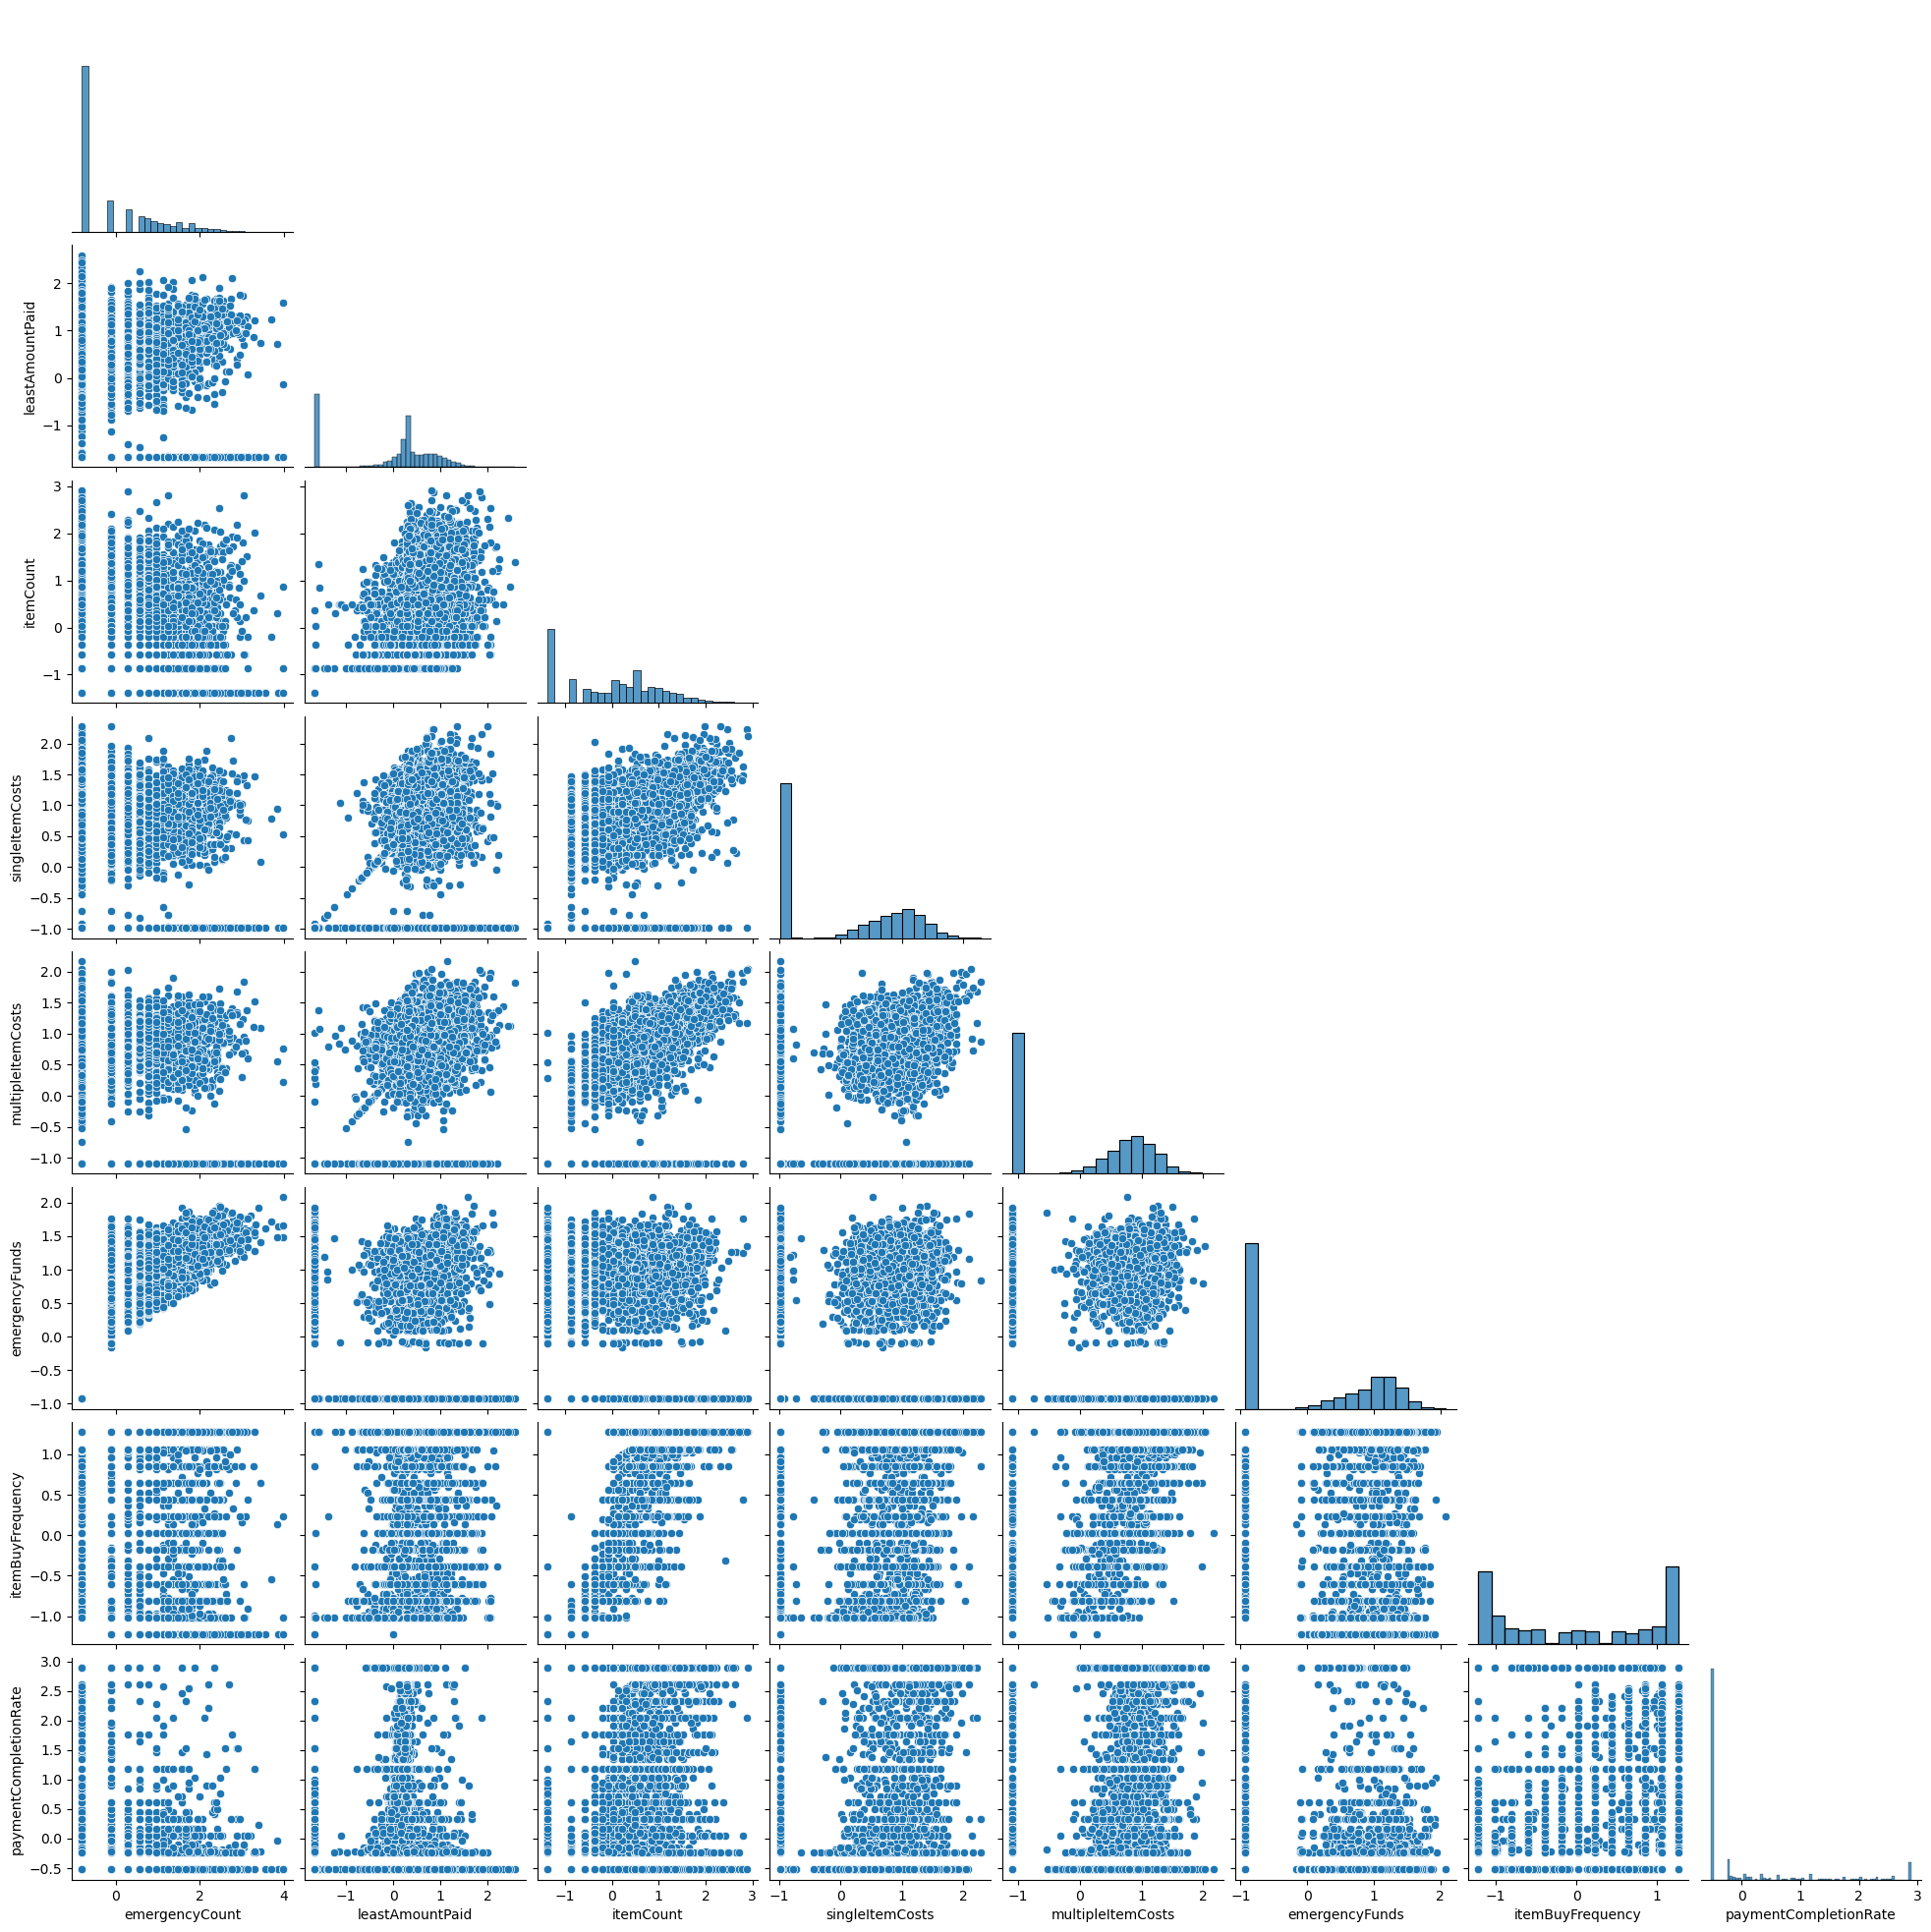

In [73]:
selected_features = ['emergencyCount', 'leastAmountPaid', 'itemCount', 'singleItemCosts',
                     'multipleItemCosts', 'emergencyFunds', 'itemBuyFrequency', 'paymentCompletionRate']
# Creating the pairplot
sns.pairplot(shopeasy_df_scaled[selected_features], corner=True)
plt.show()

## Pairplot Analysis for ShopEasy Customer Segmentation

The pairplot visualizes the relationships between selected features from the ShopEasy dataset. By examining scatter plots of feature pairs and the distribution of individual features, we gain insights into customer behaviors and interactions with the platform.

### Observations from Pairplot:

- **Diagonal Distributions:** 
  - The histograms along the diagonal show the distribution of each feature. Skewed distributions, such as for `itemCosts` and `emergencyFunds`, suggest the presence of high-value outliers or a large number of low-value transactions.

- **Scatter Plot Relationships:**
  - Positive correlations are visible as trends where points on scatter plots appear to rise together, such as between `itemBuyFrequency` and `itemCount`, indicating that frequent buyers tend to purchase more items.
  - Negative correlations appear as descending trends from left to right, seen in plots like `emergencyFunds` versus `paymentCompletionRate`, suggesting that users with more emergency funds may not always complete their payments promptly.

- **Density and Spread:**
  - The density of points near the axes, for example in `emergencyCount` vs. `emergencyFunds`, suggests that many users have emergency funds but do not frequently use them.
  - Wide spreads in plots like `itemCosts` vs. `singleItemCosts` highlight the variability in user spending, with some users making high-value purchases.

### Implications for ShopEasy:

- **Tailored Marketing Strategies:**
  - Segments with high purchase frequencies and item counts can be targeted with volume discounts or rewards programs to encourage even greater engagement.
  
- **Customer Service and Support:**
  - The usage patterns of emergency funds underscore the need for robust customer support for financial services, ensuring users feel confident in managing these funds.

- **Payment Flexibility:**
  - The relationship between `emergencyFunds` and `paymentCompletionRate` may inform the need for flexible payment options for users who prefer to maintain liquidity.

- **Credit and Spending Limits:**
  - The association between `maxSpendLimit` and `accountTotal` supports personalized credit offerings, aligning spending limits with customer spending behavior.

By leveraging the insights from this pairplot, ShopEasy can refine its customer segmentation approach, tailor marketing and financial services more effectively, and enhance the overall user experience on the platform.


In [67]:
range_of_clusters = range(1, 11)

inertia_values = []

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range_of_clusters, inertia_values, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()

NameError: name 'X' is not defined

Best parameters: {'eps': 1.9000000000000001, 'min_samples': 7}
Best silhouette score (ignoring noise): 0.04553929689712186


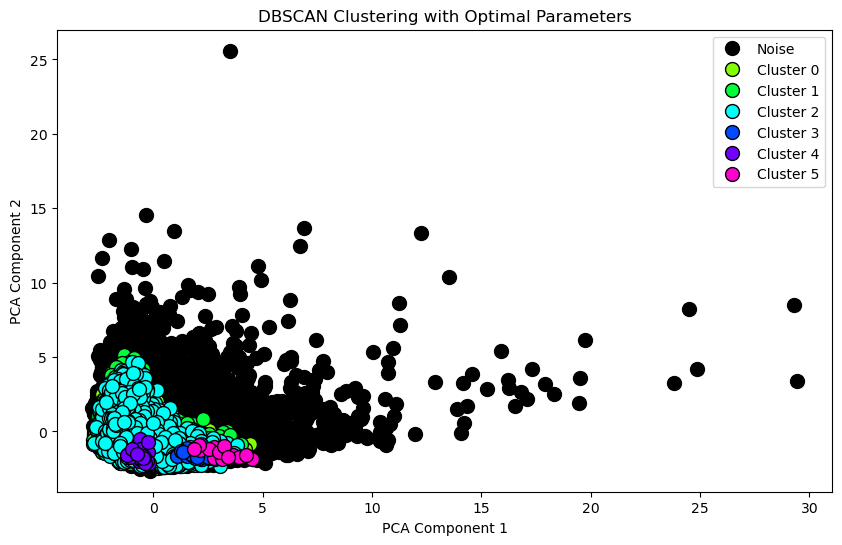

In [ ]:
selected_features = [
    # All relevant features, including encoded categorical features
    "accountTotal", "frequencyIndex", "itemCosts", "singleItemCosts",
    "multipleItemCosts", "emergencyFunds", "itemBuyFrequency",
    "singleItemBuyFrequency", "multipleItemBuyFrequency", "emergencyUseFrequency",
    "emergencyCount", "itemCount", "maxSpendLimit", "monthlyPaid",
    "leastAmountPaid", "paymentCompletionRate", "accountLifespan",
    "location_Chicago", "location_New York", "location_Los Angeles",
    "accountType_encoded", "webUsage"
]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(shopeasy_df_scaled[selected_features])

# Define a function to compute the average silhouette score for non-noise points
def silhouette_score_non_noise(X, labels):
    # Filter out noise points
    non_noise_mask = (labels != -1)
    if np.sum(non_noise_mask) > 1:  # At least 2 points to compute silhouette score
        return ss(X[non_noise_mask], labels[non_noise_mask])
    else:
        return -1  # Silhouette score is not defined for less than 2 points

# Grid search (manual) for DBSCAN parameters
eps_values = np.arange(0.1, 2.0, 0.1)  # Wider range may be necessary
min_samples_values = range(2, 11)
best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Skip silhouette score calculation if only one cluster (or none) is found
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters_ > 1:
            score = ss(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best parameters: {best_params}")
print(f"Best silhouette score (ignoring noise): {best_score}")
# Apply DBSCAN with the best parameters found
dbscan_optimal = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels_optimal = dbscan_optimal.fit_predict(X_scaled)

# Reduce dimensions for visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels_optimal)
colors = sns.color_palette('hsv', n_colors=len(unique_labels))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    
    class_member_mask = (labels_optimal == k)
    plt.plot(X_pca[class_member_mask, 0], X_pca[class_member_mask, 1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=10, 
             label='Noise' if k == -1 else f'Cluster {k}')

plt.title('DBSCAN Clustering with Optimal Parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Dimension reduction with PCA

In [74]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()
pca.fit(shopeasy_df_scaled)

# Print explained variances
print(pca.explained_variance_ratio_)

[3.25146192e-01 1.66036525e-01 8.18665167e-02 6.09566526e-02
 5.52349917e-02 5.19689986e-02 4.81747142e-02 3.88084265e-02
 3.44496664e-02 2.85151375e-02 2.37539161e-02 1.72956835e-02
 1.71539587e-02 1.49722267e-02 1.08943735e-02 8.78913159e-03
 7.17182477e-03 2.92188153e-03 2.33455946e-03 2.17022773e-03
 1.38439508e-03 1.77819731e-34]


In [75]:
# Print cumulative explained variances
cum_sum = np.cumsum(pca.explained_variance_ratio_)
dimentions = list(range(1, len(cum_sum)+1))

print(cum_sum)

[0.32514619 0.49118272 0.57304923 0.63400589 0.68924088 0.74120988
 0.78938459 0.82819302 0.86264268 0.89115782 0.91491174 0.93220742
 0.94936138 0.96433361 0.97522798 0.98401711 0.99118894 0.99411082
 0.99644538 0.9986156  1.         1.        ]


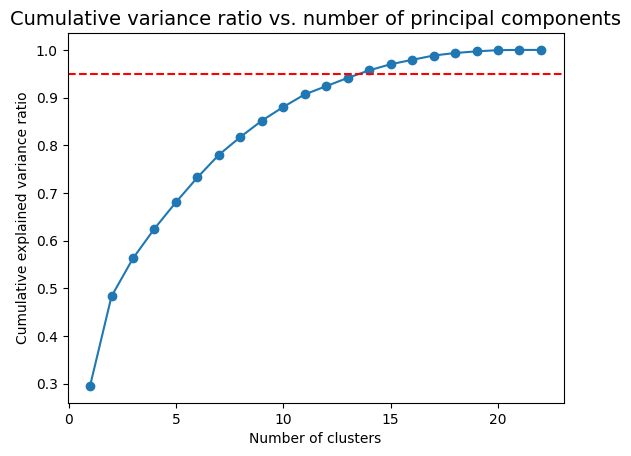

In [ ]:
keep_ratio = .95

# Plot cumulative explained variance ratio
fig, ax = plt.subplots()
ax.plot(dimentions, cum_sum)
ax.axhline(y=keep_ratio, color="red", linestyle="--")
ax.scatter(dimentions, cum_sum)
ax.set_title('Cumulative variance ratio vs. number of principal components', fontsize=14)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Cumulative explained variance ratio')
plt.show()

In [ ]:
# Reduce dimensions keeping keep_ratio cumulative variance
pca = PCA(n_components=keep_ratio)
shopeasy_reduced = pca.fit_transform(shopeasy_df_scaled)

print(f"shopeasy_reduced shape: {shopeasy_reduced.shape}")

reduced_column_names = list(range(1, shopeasy_reduced.shape[1]+1))

shopeasy_reduced shape: (8949, 14)


# Clustering - Kmean

## Find optimal number of clusters

### Explore via inertia evaluation

c:\Users\chiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\chiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\chiar\AppData\Local\Temp\ipykernel_18680\2737416761.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


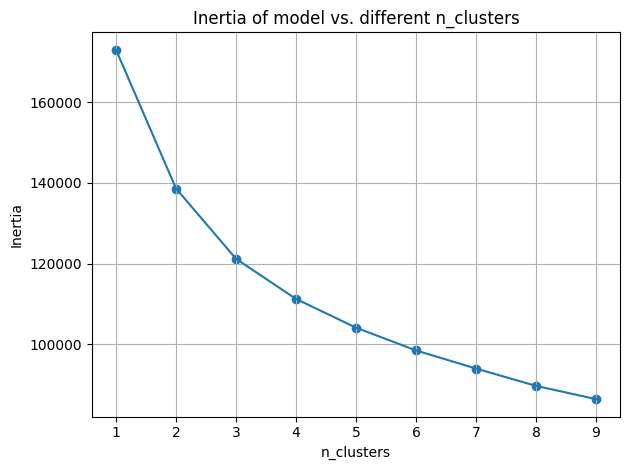

In [ ]:
n_clusters_vector = [i for i in range(1,10)]
inertia_vector = []


for n_clusters in n_clusters_vector:
  clustering_method = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init=10, random_state=42)
  clustering_method.fit(shopeasy_df_scaled)
  inertia_vector.append(clustering_method.inertia_)

fig, ax = plt.subplots()
ax.plot(n_clusters_vector, inertia_vector)
ax.scatter(n_clusters_vector, inertia_vector)
ax.set_title('Inertia of model vs. different n_clusters')
ax.set_xlabel('n_clusters')
ax.set_ylabel('Inertia')
ax.grid()
fig.tight_layout()
fig.show()

### Explore via silhouetting

C:\Users\chiar\AppData\Local\Temp\ipykernel_18680\4153631252.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


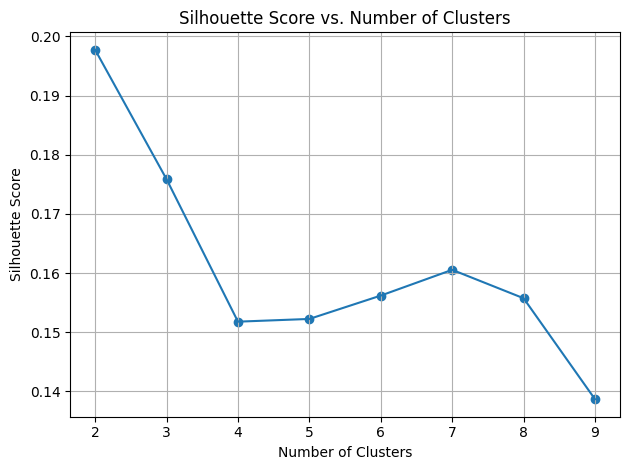

In [ ]:
n_clusters_vector = [i for i in range(2, 10)]  # Silhouette score is not defined for 1 cluster
silhouette_scores = []

for n_clusters in n_clusters_vector:
    clustering_method = KMeans(n_clusters=n_clusters, init='random', n_init='auto', random_state=42)
    cluster_labels = clustering_method.fit_predict(shopeasy_reduced)
    score = ss(shopeasy_reduced, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette
fig, ax = plt.subplots()
ax.plot(n_clusters_vector, silhouette_scores)
ax.scatter(n_clusters_vector, silhouette_scores)
ax.set_title('Silhouette Score vs. Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.grid()
fig.tight_layout()
fig.show()

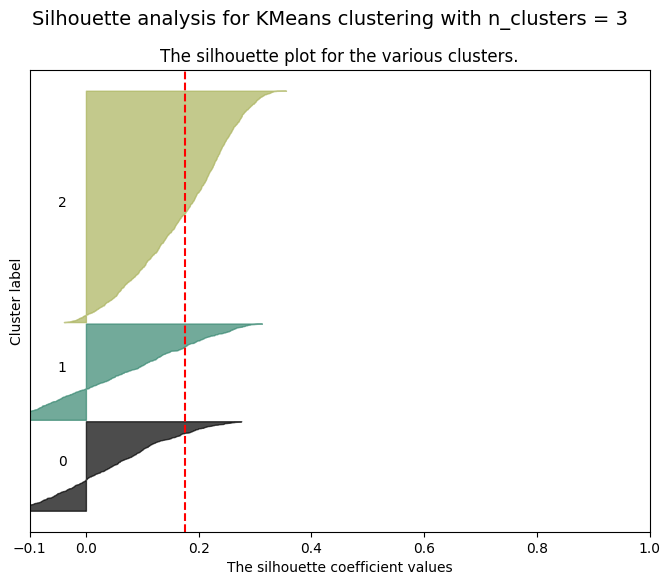

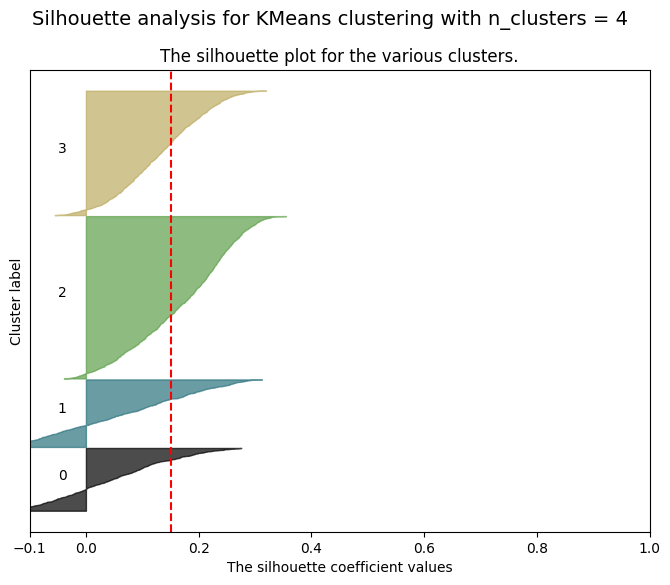

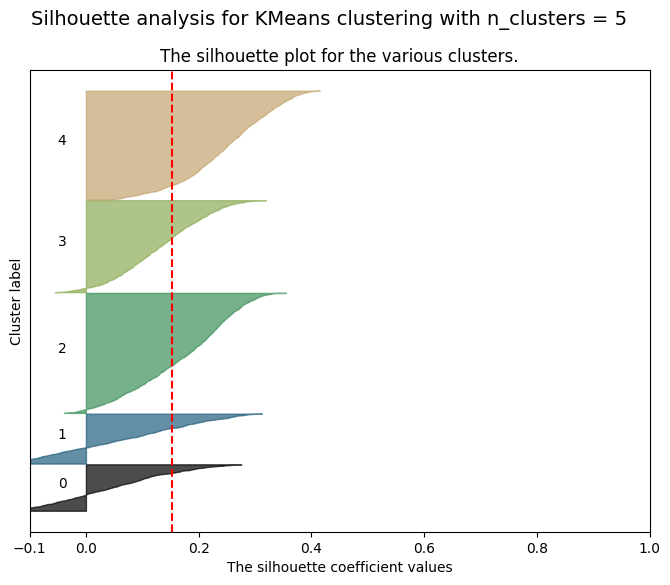

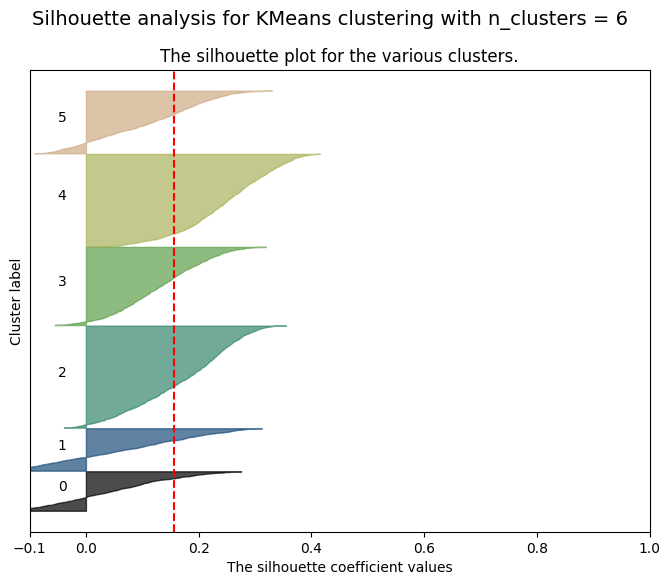

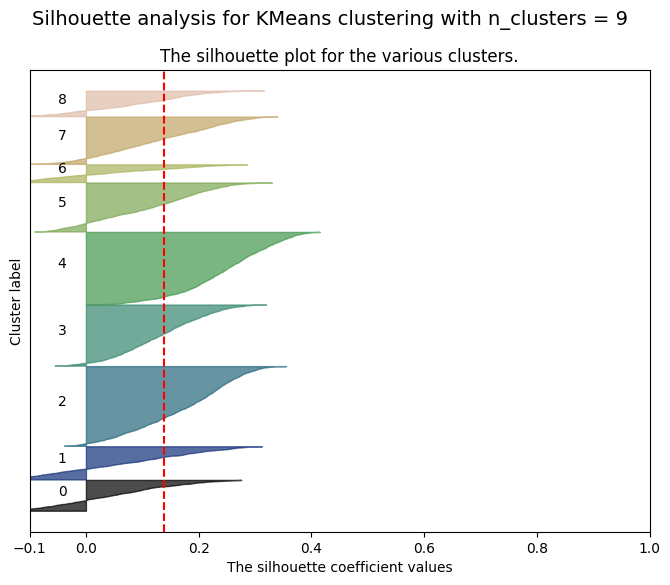

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

idx_of_interesting_clusters = [
    n_clusters_vector.index(3), 
    n_clusters_vector.index(4), 
    n_clusters_vector.index(5), 
    n_clusters_vector.index(6),  
    n_clusters_vector.index(9), 
]

for i in idx_of_interesting_clusters:
    # data relative to interesting cluster already calculated
    n_clusters =n_clusters_vector[i]
    cluster_labels = clustering_method.fit_predict(shopeasy_reduced)
    avg_silhouette = silhouette_scores[i]

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

    # The silhouette coefficient can range from -1, 1 but in this case all lie within [-.1, .4]
    ax1.set_xlim([-.1, .4])


    # Compute the silhouette scores for each sample
    cluster_labels = clustering_method.fit_predict(shopeasy_reduced)
    sample_silhouette_values = silhouette_samples(shopeasy_reduced, cluster_labels)

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.gist_earth(float(j) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=14,
    )

plt.show()

The four clusters configuration has the lowest silhouette score.

In addition, its silhouette profile shows its four cluster have a similar number of elements.

Therefore clustering will proceed useng four clusters.

## KMeans

In [255]:
n_clusters = 4

# Fit KMeans to the dataset
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init=10, random_state=42) 
y_kmeans = kmeans.fit_predict(shopeasy_reduced)

y_kmeans

array([2, 2, 2, ..., 2, 2, 2])

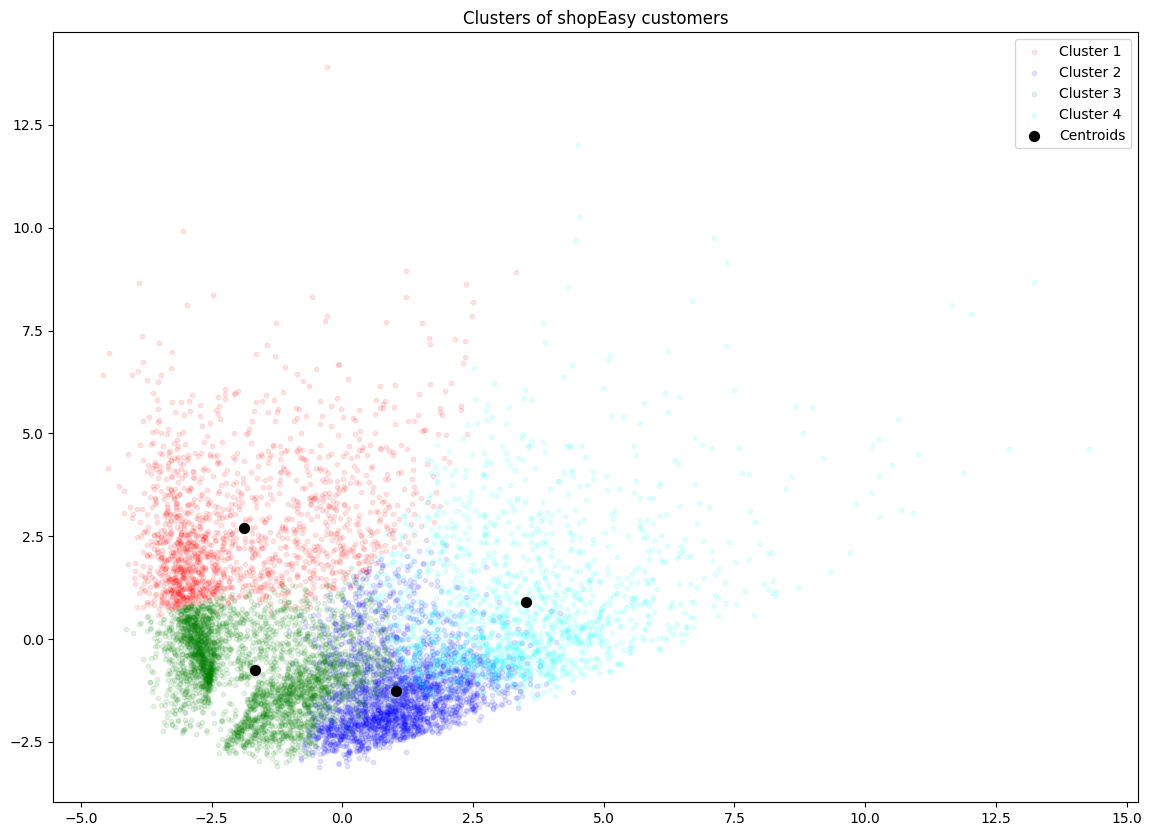

In [ ]:
# Visualise the clusters along the two most significant features

point_size = 10
alpha=.1
plt.figure(figsize=(14, 10))
plt.scatter(shopeasy_reduced[y_kmeans == 0, 0], shopeasy_reduced[y_kmeans == 0, 1], s = point_size, c = 'red', label = 'Cluster 1', alpha=alpha)
plt.scatter(shopeasy_reduced[y_kmeans == 1, 0], shopeasy_reduced[y_kmeans == 1, 1], s = point_size, c = 'blue', label = 'Cluster 2', alpha=alpha)
plt.scatter(shopeasy_reduced[y_kmeans == 2, 0], shopeasy_reduced[y_kmeans == 2, 1], s = point_size, c = 'green', label = 'Cluster 3', alpha=alpha)
plt.scatter(shopeasy_reduced[y_kmeans == 3, 0], shopeasy_reduced[y_kmeans == 3, 1], s = point_size, c = 'cyan', label = 'Cluster 4', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_kmeans == 4, 0], shopeasy_reduced[y_kmeans == 4, 1], s = point_size, c = 'magenta', label = 'Cluster 5', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_kmeans == 5, 0], shopeasy_reduced[y_kmeans == 5, 1], s = point_size, c = 'grey', label = 'Cluster 6', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_kmeans == 6, 0], shopeasy_reduced[y_kmeans == 6, 1], s = point_size, c = 'orange', label = 'Cluster 7', alpha=alpha)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 5*point_size, c = 'black', label = 'Centroids')
plt.title('Clusters of shopEasy customers')
plt.legend()
plt.show()

# Clustering - Hierarchical

## Find optimal number of clusters

In [256]:
# Calculate linkage matrix encoding (defaults to single and euclidean distance)
linkage_matrix = sch.linkage(shopeasy_reduced, method = 'ward')

# Ward's method: distance between two clusters A and B is how much the sum of squares will increase when we merge them
# single for min distance
# complete for max distance
# average for centroid distance

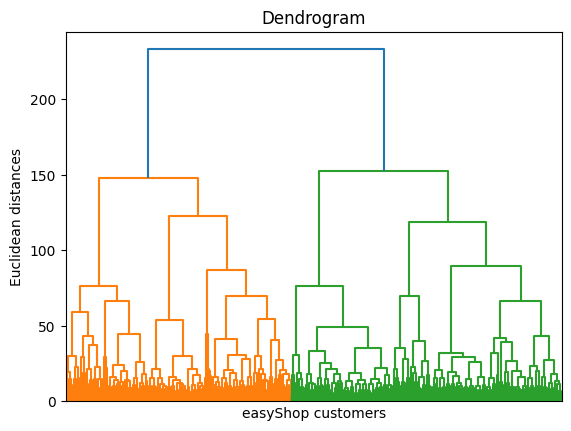

In [257]:
# Plot the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Dendrogram')
plt.xlabel('easyShop customers')
plt.ylabel('Euclidean distances')
plt.show()

From visual inspection of the dendrogram plot it appears that the customer data may be organised around four clusters.

This confirms the KMeans findings.

## Hierarchical

In [258]:
n_clusters = 4

# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(shopeasy_reduced)

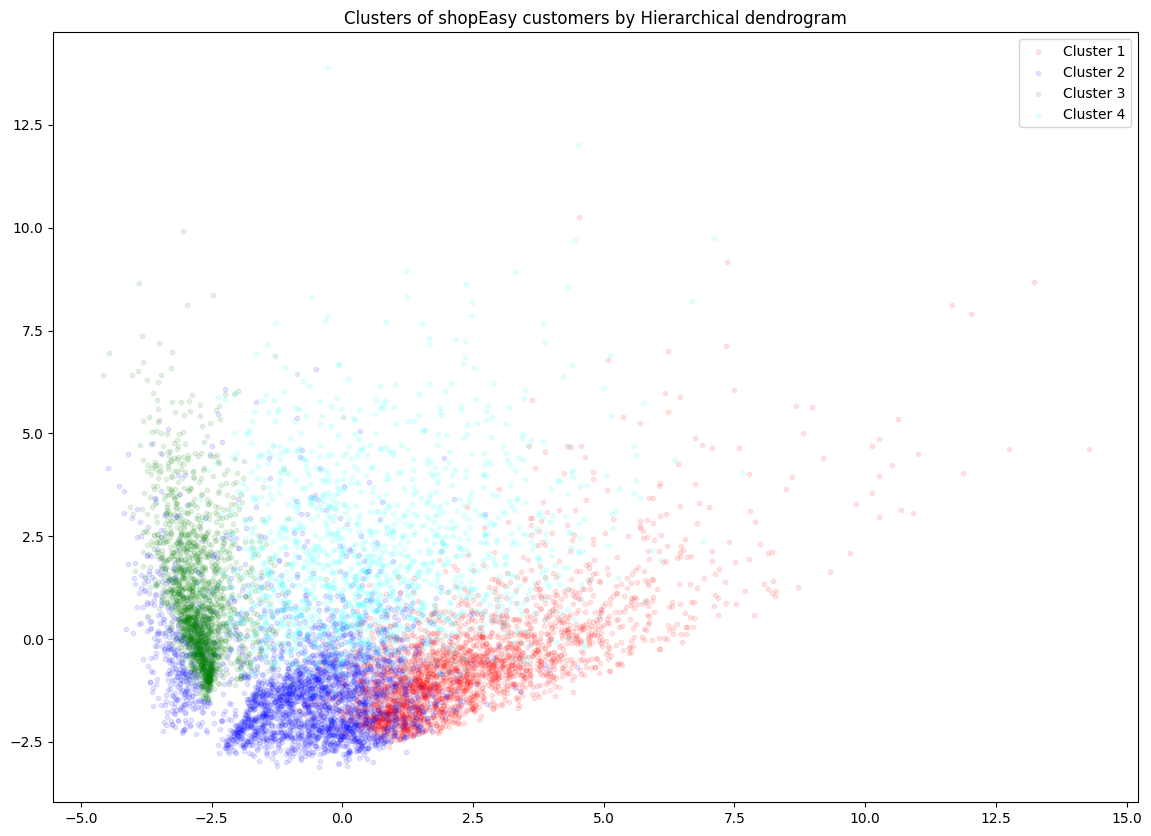

In [259]:
# Visualise the clusters
point_size = 10
alpha=.1

plt.figure(figsize=(14, 10))
plt.scatter(shopeasy_reduced[y_hc == 0, 0], shopeasy_reduced[y_hc == 0, 1], s = point_size, c = 'red', label = 'Cluster 1', alpha=alpha)
plt.scatter(shopeasy_reduced[y_hc == 1, 0], shopeasy_reduced[y_hc == 1, 1], s = point_size, c = 'blue', label = 'Cluster 2', alpha=alpha)
plt.scatter(shopeasy_reduced[y_hc == 2, 0], shopeasy_reduced[y_hc == 2, 1], s = point_size, c = 'green', label = 'Cluster 3', alpha=alpha)
plt.scatter(shopeasy_reduced[y_hc == 3, 0], shopeasy_reduced[y_hc == 3, 1], s = point_size, c = 'cyan', label = 'Cluster 4', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_hc == 4, 0], shopeasy_reduced[y_hc == 4, 1], s = point_size, c = 'magenta', label = 'Cluster 5', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_hc == 5, 0], shopeasy_reduced[y_hc == 5, 1], s = point_size, c = 'grey', label = 'Cluster 6', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_hc == 6, 0], shopeasy_reduced[y_hc == 6, 1], s = point_size, c = 'orange', label = 'Cluster 7', alpha=alpha)
plt.title('Clusters of shopEasy customers by Hierarchical dendrogram')
plt.legend()
plt.show()